## Programming for Data Analysis Project

**Francesco Troja**

***

#### An analysis of paleo-present climate data

>• Analyse CO2 vs Temperature Anomaly from 800kyrs – present;
>
>• Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage);
>
>• Examine Irish context;
>
>• Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats;
>
>• For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis);
>
>• Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue;
>
>• Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage).

## Contents

#### Introduction

This project is dedicated to exploring a crucial topic related to an ongoing concern: climate change. The investigation examines various aspects of climate change, such as the CO2 and atmospheric carbon dioxide and temperature anomaly, seeking to understand its impact, causes. Climate change has become a pressing global issue with far-reaching consequences for ecosystems, weather patterns, and human societies. Through data analysis and visualizations, the project aims to contribute valuable insights into the dynamics of climate change. The documentation will provide a comprehensive overview of the project's objectives, methodologies and findings.

The research project is structured into three distinct parts. The initial phase will primarily focus on the analysis of the relationship between CO2 levels and Temperature Anomaly over a span of 800,000 years to the present. Various datasets related to CO2 and Temperature will be imported and thoroughly examined. Ultimately, the dataset that aligns most effectively with the research objectives will be selected for further utilization. Additionally, an exploration of another relevant feature will be conducted to enhance our understanding of the climate change scenario. 

Moving on to the second part, the research scope will transition from a global perspective to a more localized examination, specifically analyzing the impact of climate and temperature changes on Ireland.

In the third and final segment of the research, the objective is to predict global temperature anomalies over the next few decades through data synthesis. This involves comparing the synthesized data with published climate models, considering the potential continuation of atmospheric CO2 trends.

#### Import Python Libraries


To execute this project, several Python libraries have been utilized. These libraries were chosen for their specific functionalities and capabilities, tailored to the requirements of the project:

- `pandas`: The library's powerful data structures, including DataFrames and Series, allowed for efficient organization and structuring of data, making it easy to perform various data operations, such as filtering, grouping, and aggregating.Pandas offered a wide range of functions for data cleaning and preparation, making it ideal for addressing real-world data challenges[1].
- `matplotlib.pyplot`: It is a widely used library for data visualization in Python. It provides a flexible and comprehensive set of tools to create various types of plots and charts. Its versatility allows to create bar charts, line plots, scatter plots, histograms, and more, making it an essential tool for exploratory data analysis and presentation of findings[2].
- `numpy`: It is imported in this context for its extensive capabilities in numerical and statistical operations. Numpy provides a wide range of probability distributions, functions for generating random numbers following these distributions, and tools for statistical calculations[3].
- `scipy.stats`: It includes an extensive array of statistical functionalities, covering various aspects of probability and data analysis. It includes a diverse set of probability distributions, facilitating the modeling of different random variables. Moreover, the module provides tools for generating summary and frequency statistics, allowing for a comprehensive understanding of dataset characteristics[4].
- `seaborn`: Seaborn is a powerful Python data visualization library based on Matplotlib. It is designed to work seamlessly with Pandas DataFrames and provides a high-level interface for drawing attractive and informative statistical graphics[5].

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Importing the Dataset

#### Atmospheric Carbon Dioxide datasets

Determining past atmospheric carbon dioxide concentrations involves analyzing air composition trapped in Antarctic ice cores. The first Dataset incorporates combined data from the Antarctic Vostok and EPICA Dome C ice cores, offering a comprehensive record spanning 800,000 years. This dataset serves as a valuable resource for studying long-term climatic patterns and trends over a substantial time frame. The inclusion of information from both the Vostok and EPICA Dome C ice cores enhances the dataset's coverage and contributes to a more thorough understanding of historical climate variations in the Antarctic region.

Prior to importing the dataset, it's essential to note that a folder named "dataset" has been established within the repository. This folder is intended to consolidate all pertinent information and files associated with datasets. Having a dedicated folder for datasets helps maintain organization within the repository and facilitates easy access to dataset-related information and files.

#### Luthi et al. 2008 Nature Paper CO2 Dataset

The primary challenge arose while attempting to access the dataset. The original dataset was obtained in .xls format, necessitating some data cleansing process to convert the file into a CSV format and subsequently create a DataFrame for further analysis. To read the .xls file, the Python pandas library was utilized, specifically employing the pd.read_excel function. Given that the .xls file contained multiple sheets, the sheet_name parameter was utilized to extract information from a specific sheet among the four available in the Excel file[6]. Upon careful analysis of the Excel file, it was determined that the data present in the "New CO2 data, 2. Vostok-TD-Dome C" sheet was consolidated in the tab labeled "3. Composite CO2." Therefore, this tab was selected for subsequent analysis.

In [2]:
read_file = pd.read_excel ('dataset/CO2_data_from_Luthi_et_al._2008_Nature_Paper.xls', sheet_name='3.  Composite CO2')

Once the data is read from the .xls file, it's essential to convert it into a CSV file and store it in a new file within the dataset folder. This transformation can be achieved using Pandas' to_csv function. This method writes the content of the DataFrame derived from the read_file into a CSV file specified by a chosen path, like 'dataset/annual-CO2.csv'. Converting the Excel file to a CSV format offers numerous advantages. It enhances data interoperability, simplifies the analysis process, and ensures a more straightforward workflow for various data-related tasks[7].

In [3]:
read_file.to_csv ('dataset/annual-CO2.csv', index = None, header=True)

The next step requires utilizing the pd.read_csv function to read the new DataFrame. This action is essential because the to_csv operation doesn't automatically generate a new DataFrame object in the memory. The pd.read_csv function is employed to load the data from a CSV file into a DataFrame, enabling further processing and analysis on the dataset[8].

In [4]:
df = pd.read_csv('dataset/annual-CO2.csv')

# print the fist 10 ros of the dataset to check for errors
df.head(10)

,Composite CO2 record (0-800 kyr BP),Unnamed: 1
0,0-22 kyr BP:,Dome C (Monnin et al. 2001) measured at Univer...
1,22-393 kyr BP:,Vostok (Petit et al. 1999; Pepin et al. 2001; ...
2,393-416 kyr BP:,Dome C (Siegenthaler et al. 2005) measured at ...
3,416-664 kyr BP:,Dome C (Siegenthaler et al. 2005) measured at...
4,664-800 kyr BP:,Dome C (Luethi et al. (sub)) measured at Unive...
5,EDC3_gas_a (yr),CO2 (ppmv)
6,137,280.4
7,268,274.9
8,279,277.9
9,395,279.1


Upon reviewing the dataset, several issues become evident. Firstly, the header names appear to be incorrect. Additionally, the dataset contains extraneous information from index 0 to index 5, likely due to non-numeric data present in the initial rows of the original .xls file. To ensure accurate analysis, it's crucial to address these issues and rectify the dataset, as inaccurate information might lead to complications during analysis.

- Step 1: Rename the column headers: To rename multiple column headers, the rename() method is employed. This method facilitates the renaming of both a single column and multiple columns simultaneously. The columns containing the new values are passed as arguments, and the inplace=True parameter is set to modify the working DataFrame directly[9].

Following an analysis of the .xls file, it becomes apparent that the accurate header names for the data are "EDC3_gas_a (yr)" and "CO2 (ppmv)." To streamline the analysis, the column named "EDC3_gas_a (yr)" will be changed to "Year."

In [5]:
# https://www.geeksforgeeks.org/how-to-rename-multiple-column-headers-in-a-pandas-dataframe/
dict = {'Composite CO2 record (0-800 kyr BP)': 'Year',
        'Unnamed: 1': 'CO2 (ppmv)'}
df.rename(columns=dict,
          inplace=True)

- Step 2:  removing additional non-numeric information from the dataset. To accomplish this, leverage the iloc[] function in Pandas to discard the initial row of the DataFrame. The iloc[] function facilitates the selection of a particular portion of the DataFrame by indices, effectively excluding specified rows[10]. After the removal of the first row, the reset_index() function is employed to reset the DataFrame's index, replacing it with the default index[11].

In [6]:
df = df.iloc[6:].reset_index(drop=True)
df.head()

,Year,CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9


In the provided code, it's evident that we have successfully streamlined the dataset by retaining only the essential information in the two main columns (Year ad CO2 (ppmv)). Before proceeding with further analysis and visualization, two key aspects need consideration: identifying the sources of our dataset and ensuring the correctness of data types.


Let's first address the dataset's sources. While we removed non-numeric information earlier, a closer look at the original file reveals non-numeric variables indicating the data sources. For each set of years, a distinct source was responsible for retrieving the information. To maintain transparency and account for the source variability, it is crucial to create a new column named "source" and populate it with this information.

In [7]:
# Add a new 'source' column and assign labels based on index ranges
df['source'] = 'Unknown'  # Default value

df.loc[:182, 'source'] = 'Dome C (Monnin et al. 2001)'
df.loc[183:516, 'source'] = 'Vostok (Petit et al. 1999; Pepin et al. 2001; Raynaud et al. 2005)'
df.loc[517:536, 'source'] = 'Dome C (Siegenthaler et al. 2005 - Grenoble)'
df.loc[537:858, 'source'] = 'Dome C (Siegenthaler et al. 2005 - Bern)'
df.loc[859: , 'source'] = 'Dome C (Luethi et al. (sub) - Bern)'

Let's proceed with an analysis of the data types present in the dataset. Understanding the data types is crucial for effective data exploration and manipulation in the subsequent stages of the analysis. Now, let's execute the necessary code to extract information about the data types used in the dataset.

In [8]:
print('The datatype of the dataset are:')
df.info()

The datatype of the dataset are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        1096 non-null   object
 1   CO2 (ppmv)  1096 non-null   object
 2   source      1096 non-null   object
dtypes: object(3)
memory usage: 25.8+ KB


Following the information provided by the info function, an immediate observation is evident. All columns in the dataset share the same data type, namely, 'Object.' This suggests that all data in the dataset is being treated as strings or non-numerical variables. However, it is apparent that certain variables, such as 'Year' and 'CO2 (ppmv),' should ideally be represented as integers and floating-point numbers, respectively, since they are numerical variables.

In pandas, the data type of a column can be modified using the .astype() function. To convert a specific column, it is necessary to explicitly specify that column. Alternatively, if no specific column is specified, the function will convert all columns to the designated data type. This adjustment in data types is crucial for ensuring accurate numerical analysis and visualization of the dataset. By appropriately representing numerical variables, we can perform mathematical operations, conduct statistical analyses, and generate visualizations that align with the data[12]. 

In [9]:
# Change Type For One or Multiple Columns
df = df.astype({"Year": int, "CO2 (ppmv)": float})

Now, the CO2 levels over time will be visualized using two types of visualizations to analyze the data. The first visualization focuses on the overall distribution of the dataset, while the second aims to associate a color with each set of years linked to different sources. The use of distinct colors for different source categories aids in distinguishing researcher contributions to the overall CO2 levels.

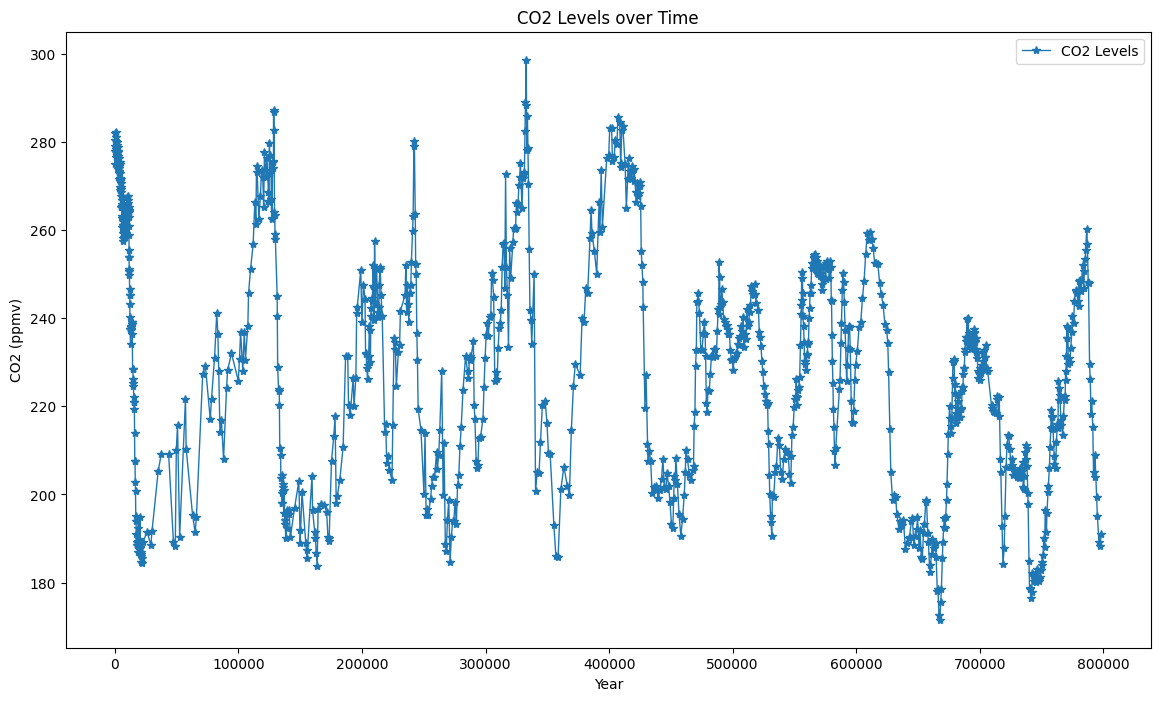

In [10]:
plt.figure(figsize=(14, 8))
plt.plot(df['Year'], df['CO2 (ppmv)'], marker='*', linewidth=1, label='CO2 Levels')
plt.title('CO2 Levels over Time')
plt.xlabel('Year')
plt.ylabel('CO2 (ppmv)')
plt.legend()
#plt.savefig('Antarctic Vostok and EPICA Dome C ice cores CO2 visualization.png')
plt.show()

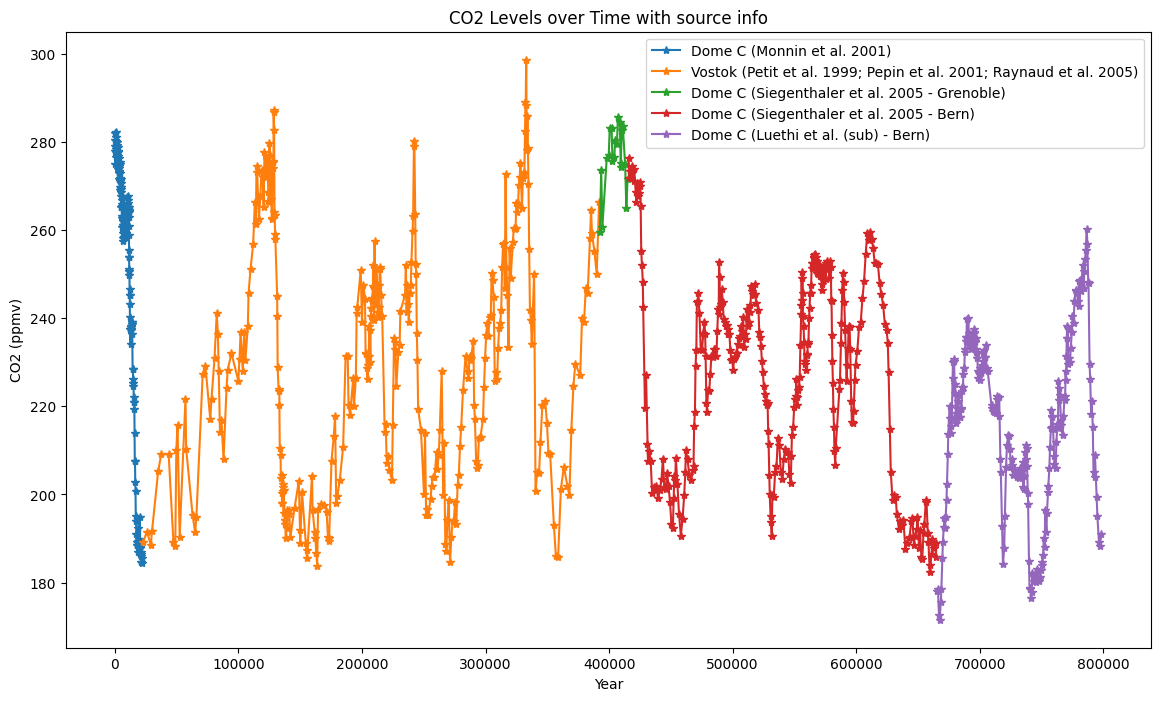

In [11]:
# Get unique sources
unique_sources = df['source'].unique()

plt.figure(figsize=(14, 8))
for source in unique_sources:
    subset = df[df['source'] == source]
    plt.plot(subset['Year'], subset['CO2 (ppmv)'], marker='*', label=source)

plt.title('CO2 Levels over Time with source info')
plt.xlabel('Year')
plt.ylabel('CO2 (ppmv)')
plt.legend()
#plt.savefig('Antarctic Vostok and EPICA Dome C ice cores CO2 visualization with colors.png')
plt.show()

The Antarctic Vostok and EPICA Dome C ice cores represent two deep drilling projects in the Dronning Maud Land (DML) region at Kohnen Station and Concordia Station (Dome C), respectively. These ice cores provide crucial data about past atmospheric conditions, offering insights into concentrations of various elements and compounds before routine atmospheric measurements began in 1958. Analyzing the air trapped within these ice cores offers a direct method to assess the concentrations of different substances, providing a glimpse into historical atmospheric compositions. Over the years, several research studies, including those conducted in Bern and Grenoble, have built upon the findings from the Vostok and EPICA Dome C ice core studies. These endeavors aimed to validate accuracy and explore additional methodologies to gather past data, enhancing our understanding of historical environmental conditions[13].

The visualizations presented above offer a compelling visual representation of carbon dioxide (CO2) concentration in the atmosphere as measured from various ice core samples. Covering approximately 800,000 years of Earth's history, the data reveals natural fluctuations in CO2 levels. A distinct cyclical pattern emerges, corresponding to Earth's glacial and interglacial periods. Glacial periods exhibit lower CO2 concentrations, while interglacial periods, including the current one, demonstrate higher levels. Despite diverse sources, there is remarkable consistency in the data, validating ice core records as reliable proxies for historical atmospheric conditions. Notably, the graph highlights a significant recent increase in CO2 levels, unprecedented in the natural variability observed over the last 800,000 years. This rise is attributed to human activities, particularly the combustion of fossil fuels.

2. IPCC CO2 Report Dataset

The second dataset utilized for the analysis of CO2 records from Antarctic ice cores corresponds to the CO2 dataset extracted from the IPCC report. The readme section within the report provides valuable insights for better comprehension. This dataset, representing a new iteration of the CO2 composite, supersedes the previous version by Lüthi et al. (2008). The age unit is denoted in years before present (yr BP), where "present" is defined as the year 1950. The dataset encompasses two main sheets: "all records" and "CO2 Composite." It's essential to note that not all records displayed in the "all records" sheet contribute to the composite dataset. The "all records" table proves beneficial for analyzing millennial-scale or finer details of the composite. This sheet offers comprehensive information, including the year, CO2 levels (ppmv), ice depth, sigma mean, and other details. However, for the current analysis, specific details such as ice depth and sigma mean might not be pertinent. 

Before comparing the IPCC report to the Luthi - Nature Paper one and determining which is better for our analysis, let's proceed to import data from both the "all records" and "CO2 composite" sheets. This step is crucial in assessing whether the "all records" dataset provides additional details that could enhance our analysis.

In [12]:
ipcc_report = pd.read_excel('dataset/CO2_data_from_IPCC_Report.xls', sheet_name='all records')

One significant challenge posed by the dataset is the horizontal arrangement of information, complicating the straightforward conversion of the file into a CSV format. To facilitate the conversion from .xls to .csv, preliminary data cleansing steps are required. An initial measure involves segmenting the dataset into distinct sets of years and rename each column, mirroring the approach employed during the analysis of the initial dataset.

In [13]:
# creating subcategories for the dataset
dome_c_monnin = ipcc_report.iloc[6:189, 2:4]
vostok_petit = ipcc_report.iloc [6:355, 7:9]
taylor_dome_indermuhle = ipcc_report.iloc [6:79, 10:12]
dome_c_siegenthaler_bern = ipcc_report.iloc [6:328, 15:17]
dome_c_siegenthaler_grenoble = ipcc_report.iloc [6:37, 20:22]
dome_c_luthi_bern = ipcc_report.iloc [6:257, 24:26]
dome_c_luthi_grenoble = ipcc_report.iloc [6:53, 29:31]
talos_dome_bereiter = ipcc_report.iloc [6:122, 34:36]
edml_bereiter =  ipcc_report.iloc [6:64, 39:41]
byrd_ahn = ipcc_report.iloc [6:177, 45:47]
edc_lourantou = ipcc_report.iloc [6:69, 50:52]
edc_lourantou_2010 = ipcc_report.iloc [6:45, 55:57]
edc_schmitt = ipcc_report.iloc [6:31, 60:62]
edc_schneider = ipcc_report.iloc [6:76, 65:67]
law_dome_macfarling = ipcc_report.iloc [6:142, 68:70]
wais_ahn = ipcc_report.iloc [6:115, 71:73]
edml_monnin = ipcc_report.iloc [6:101, 76:78]
law_dom_southpole_rubino = ipcc_report.iloc [6:338, 83:85]
siple_dome_ahn = ipcc_report.iloc [6:216, 89:91]
siple_dome_ahn_2014= ipcc_report.iloc [6:113, [93, 95]]
wais_marcott = ipcc_report.iloc [6:329, 98:100]
edc_bereiter = ipcc_report.iloc [6:398, 102:104]

In [14]:
# rename the columms
dome_c_monnin.rename(columns=({'Unnamed: 2':'year', 'Unnamed: 3':'CO2 (ppmv)'}), inplace=True)
vostok_petit.rename(columns=({'Unnamed: 7':'year', 'Unnamed: 8':'CO2 (ppmv)'}), inplace=True)
taylor_dome_indermuhle.rename(columns=({'Unnamed: 10':'year', 'Unnamed: 11':'CO2 (ppmv)'}), inplace=True)
dome_c_siegenthaler_bern.rename(columns=({'Unnamed: 15':'year', 'Unnamed: 16':'CO2 (ppmv)'}), inplace=True)
dome_c_siegenthaler_grenoble.rename(columns=({'Unnamed: 20':'year', 'Unnamed: 21':'CO2 (ppmv)'}), inplace=True) 
dome_c_luthi_bern.rename(columns=({'Unnamed: 24':'year', 'Unnamed: 25':'CO2 (ppmv)'}), inplace=True)
dome_c_luthi_grenoble.rename(columns=({'Unnamed: 29':'year', 'Unnamed: 30':'CO2 (ppmv)'}), inplace=True)
talos_dome_bereiter.rename(columns=({'Unnamed: 34':'year', 'Unnamed: 35':'CO2 (ppmv)'}), inplace=True) 
edml_bereiter.rename(columns=({'Unnamed: 39':'year', 'Unnamed: 40':'CO2 (ppmv)'}), inplace=True)
byrd_ahn.rename(columns=({'Unnamed: 45':'year', 'Unnamed: 46':'CO2 (ppmv)'}), inplace=True)
edc_lourantou.rename(columns=({'Unnamed: 50':'year', 'Unnamed: 51':'CO2 (ppmv)'}), inplace=True)
edc_lourantou_2010.rename(columns=({'Unnamed: 55':'year', 'Unnamed: 56':'CO2 (ppmv)'}), inplace=True)
edc_schmitt.rename(columns=({'Unnamed: 60':'year', 'Unnamed: 61':'CO2 (ppmv)'}), inplace=True)
edc_schneider.rename(columns=({'Unnamed: 65':'year', 'Unnamed: 66':'CO2 (ppmv)'}), inplace=True)
law_dome_macfarling.rename(columns=({'Law Dome (0-2 kyr BP)':'year', 'Unnamed: 69':'CO2 (ppmv)'}), inplace=True)
wais_ahn.rename(columns=({'Unnamed: 71':'year', 'Unnamed: 72':'CO2 (ppmv)'}), inplace=True)
edml_monnin.rename(columns=({'Unnamed: 76':'year', 'Unnamed: 77':'CO2 (ppmv)'}), inplace=True)
law_dom_southpole_rubino.rename(columns=({'Unnamed: 83':'year', 'Unnamed: 84':'CO2 (ppmv)'}), inplace=True)
siple_dome_ahn.rename(columns=({'Unnamed: 89':'year', 'Unnamed: 90':'CO2 (ppmv)'}), inplace=True)
siple_dome_ahn_2014.rename(columns=({'Unnamed: 93':'year', 'Unnamed: 95':'CO2 (ppmv)'}), inplace=True)
wais_marcott.rename(columns=({'Unnamed: 98':'year', 'Unnamed: 99':'CO2 (ppmv)'}), inplace=True)
edc_bereiter.rename(columns=({'Unnamed: 102':'year', 'Unnamed: 103':'CO2 (ppmv)'}), inplace=True)

To complete the data cleansing process, the pd.concat function is used to concatenate all the new subcategory datasets into a single consolidated dataset. This function is particularly useful because it allows for the combination of multiple dataframes along a particular axis (either rows or columns)[14].

In [15]:
concatenate = [dome_c_monnin, vostok_petit, taylor_dome_indermuhle, dome_c_siegenthaler_bern, dome_c_siegenthaler_grenoble, 
               dome_c_luthi_bern,dome_c_luthi_grenoble, talos_dome_bereiter, edml_bereiter, byrd_ahn,edc_lourantou,edc_lourantou_2010,edc_schmitt,
               edc_schneider,law_dome_macfarling,wais_ahn,edml_monnin,law_dom_southpole_rubino,
               siple_dome_ahn,siple_dome_ahn_2014,wais_marcott,edc_bereiter]
ipcc_co2_df = pd.concat(concatenate, ignore_index = True)

In [16]:
# store the csv file locally
ipcc_co2_df.to_csv ('dataset/annual-CO2-IPCC-Report.csv', index = None, header=True)
ipcc_co2_df = pd.read_csv('dataset/annual-CO2-IPCC-Report.csv')

In [17]:
# check if there are issues in the dataset
ipcc_co2_df.head()

,year,CO2 (ppmv)
0,350.110103,280.4
1,486.693200,274.9
2,501.195000,277.9
3,539.649455,279.1
4,539.894909,281.9


In [18]:
ipcc_co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3502 entries, 0 to 3501
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3497 non-null   float64
 1   CO2 (ppmv)  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


The dataset contains missing values and to ensure accurate visualization of the data, it is necessary to handle and remove all missing values from the dataset.

In [19]:
def remove_null_values(df):
    cleaned_df = df.dropna(subset=['year', 'CO2 (ppmv)'])
    return cleaned_df

new_ipcc_co2_df = remove_null_values(ipcc_co2_df)

It is also advisable to examine the dataset for duplicate entries pertaining to the year, as this could potentially introduce complications during the visualization process.

In [20]:
# Check for duplicates in the 'year' column
duplicates = new_ipcc_co2_df.duplicated(subset=['year'], keep=False)

In [21]:
# Display the number of duplicate years
print('Number of duplicate years:', duplicates.sum())

Number of duplicate years: 238


 After completing the dataset cleaning process by eliminating null values, it was observed that the year column contains 238 duplicate values. This situation could pose an issue, especially when plotting data, as multiple CO2 values for the same year might lead to a non-continuous line. To resolve this issue, a strategy of aggregating CO2 values by year is proposed. This involves calculating either the average or median CO2 value for each year, providing a more continuous and representative view of the data across different years.

In [22]:
ipcc_co2_df_no_dup = new_ipcc_co2_df.groupby('year')['CO2 (ppmv)'].mean().reset_index()

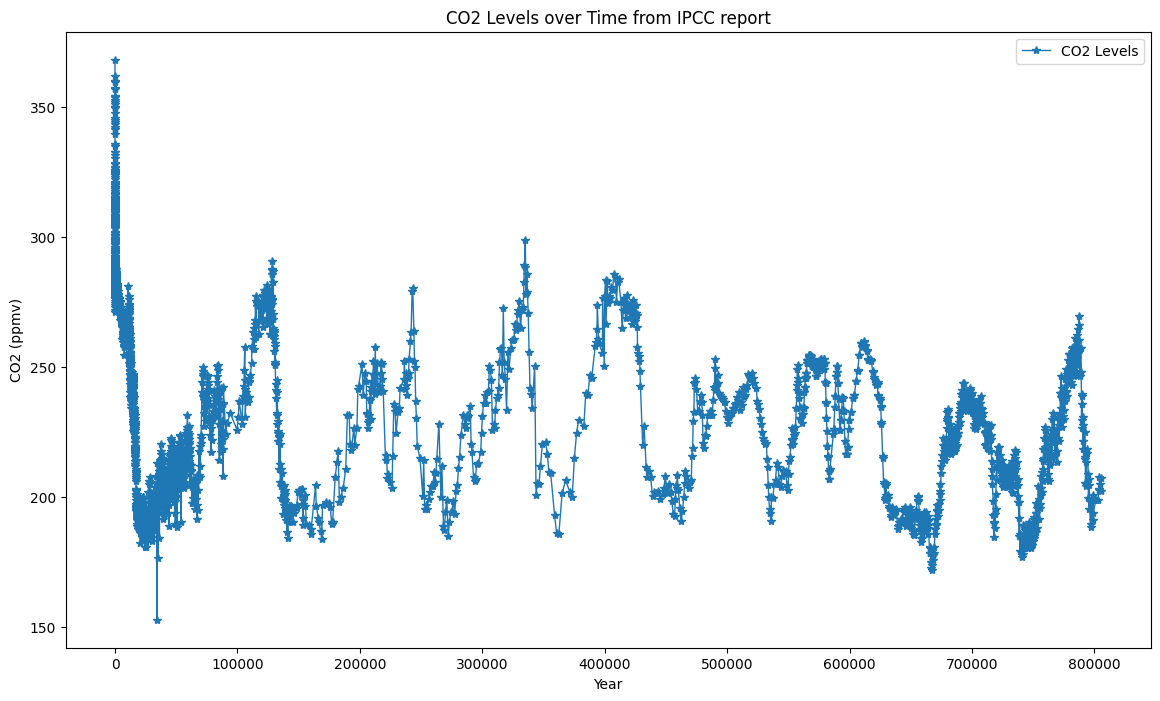

In [23]:
# visualize the dataset
plt.figure(figsize=(14, 8))
plt.plot(ipcc_co2_df_no_dup['year'], ipcc_co2_df_no_dup['CO2 (ppmv)'], linewidth=1, label='CO2 Levels', marker='*')
plt.title('CO2 Levels over Time from IPCC report')
plt.xlabel('Year')
plt.ylabel('CO2 (ppmv)')
plt.legend()
#plt.savefig('IPCC CO2 REport visualization.png')
plt.show()

Moving on to the CO2 Composite sheet, it is time to replicate the analysis previously conducted for the first two datasets.

In [24]:
# read the .xls file and convert it into .csv
read_file_ipcc = pd.read_excel ('dataset/CO2_data_from_IPCC_Report.xls', sheet_name='CO2 Composite')
read_file_ipcc.to_csv ('dataset/CO2-Composite-IPCC-Report.csv', index = None, header=True)

In [25]:
df_ipcc_composite = pd.read_csv('dataset/CO2-Composite-IPCC-Report.csv')

In [26]:
df_ipcc_composite = df_ipcc_composite.iloc[14:].reset_index(drop=True)

In [27]:
# rename the columns
df_ipcc_composite.rename(columns={
    'Composite CO2 record (0-800 kyr BP)': 'year',
    'Unnamed: 1': 'CO2 (ppmv)',
    'Unnamed: 2': 'sigma mean CO2 (ppmv)'
}, inplace=True)

In [28]:
df_ipcc_composite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   1901 non-null   object
 1   CO2 (ppmv)             1901 non-null   object
 2   sigma mean CO2 (ppmv)  1901 non-null   object
dtypes: object(3)
memory usage: 44.7+ KB


The decision has been made to exclude the sigma mean CO2 (ppmv) variable from the dataset, as it is currently not required for the analysis. 

In [29]:
df_ipcc_composite = df_ipcc_composite.drop('sigma mean CO2 (ppmv)', axis=1)

In [30]:
# convert columns to right datatype
df_ipcc_composite = df_ipcc_composite.astype({"year": float, "CO2 (ppmv)": float})

In [31]:
# adding the source column
df_ipcc_composite['source'] = 'Unknown'  # Default value

df_ipcc_composite.loc[:247, 'source'] = 'Law Dome (Rubino et al., 2013)'
df_ipcc_composite.loc[248:252, 'source'] = 'Law Dome (MacFarling Meure et al., 2006)'
df_ipcc_composite.loc[253:347, 'source'] = 'Dome C (Monnin et al., 2001 + 2004)'
df_ipcc_composite.loc[348:637, 'source'] = 'WAIS (Marcott et al., 2014)'
df_ipcc_composite.loc[638:832 , 'source'] = 'Siple Dome (Ahn et al., 2014)'
df_ipcc_composite.loc[833:910, 'source'] = 'TALDICE (Bereiter et al., 2012)'
df_ipcc_composite.loc[911:1004 , 'source'] = 'EDML (Bereiter et al., 2012)'
df_ipcc_composite.loc[1005:1076 , 'source'] = 'Dome C Sublimation (Schneider et al., 2013)'
df_ipcc_composite.loc[1077:1300 , 'source'] = 'Vostok (Petit et al., 1999)'
df_ipcc_composite.loc[1301:1590 , 'source'] = 'Dome C (Siegenthaler et al., 2005)'
df_ipcc_composite.loc[1591: , 'source'] = 'Dome C (Bereiter et al., 2014)'

In [32]:
df_ipcc_composite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        1901 non-null   float64
 1   CO2 (ppmv)  1901 non-null   float64
 2   source      1901 non-null   object 
dtypes: float64(2), object(1)
memory usage: 44.7+ KB


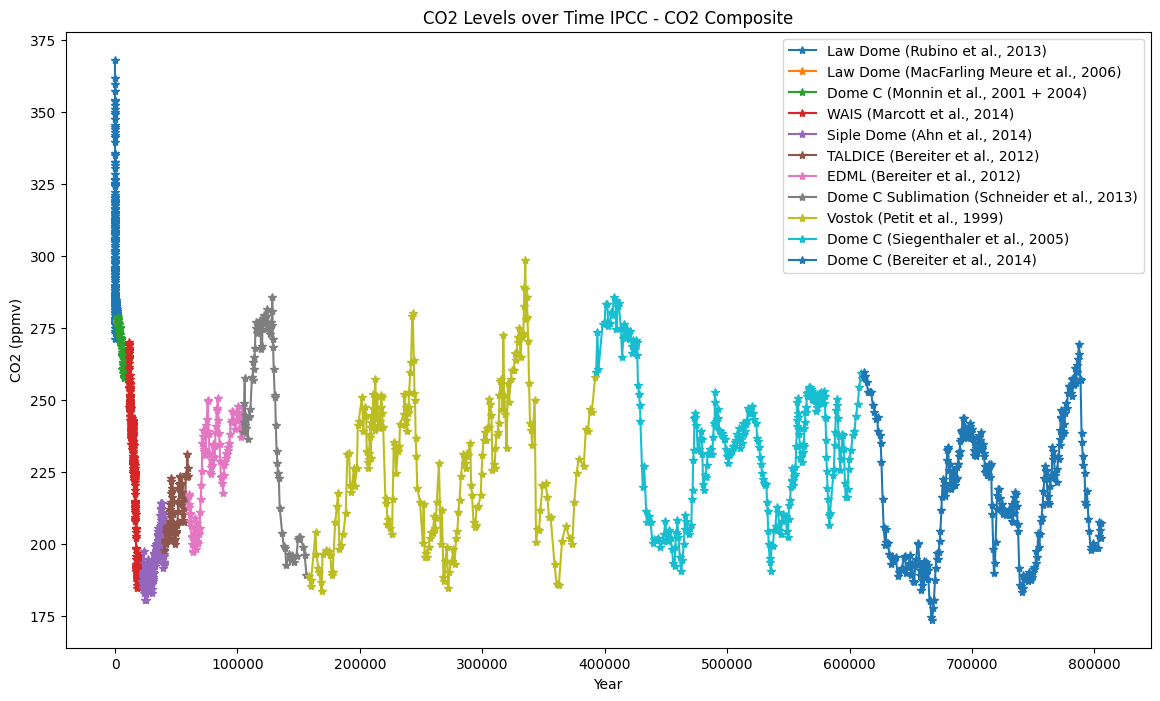

In [33]:
# visualize the dataset
unique_sources = df_ipcc_composite['source'].unique()

plt.figure(figsize=(14, 8))
for source in unique_sources:
    subset = df_ipcc_composite[df_ipcc_composite['source'] == source]
    plt.plot(subset['year'], subset['CO2 (ppmv)'], marker='*', label=source)

plt.title('CO2 Levels over Time IPCC - CO2 Composite')
plt.xlabel('Year')
plt.ylabel('CO2 (ppmv)')
plt.legend()
#plt.savefig('IPCC - CO2 Composite: CO2 visualization with colors.png')
plt.show()

In the final step, visualizing the two datasets retrieved from the IPCC report becomes crucial to assess the presence of a strong correlation between them. The process involves creating plots that allow a comprehensive examination of the relationship between the variables in both datasets.

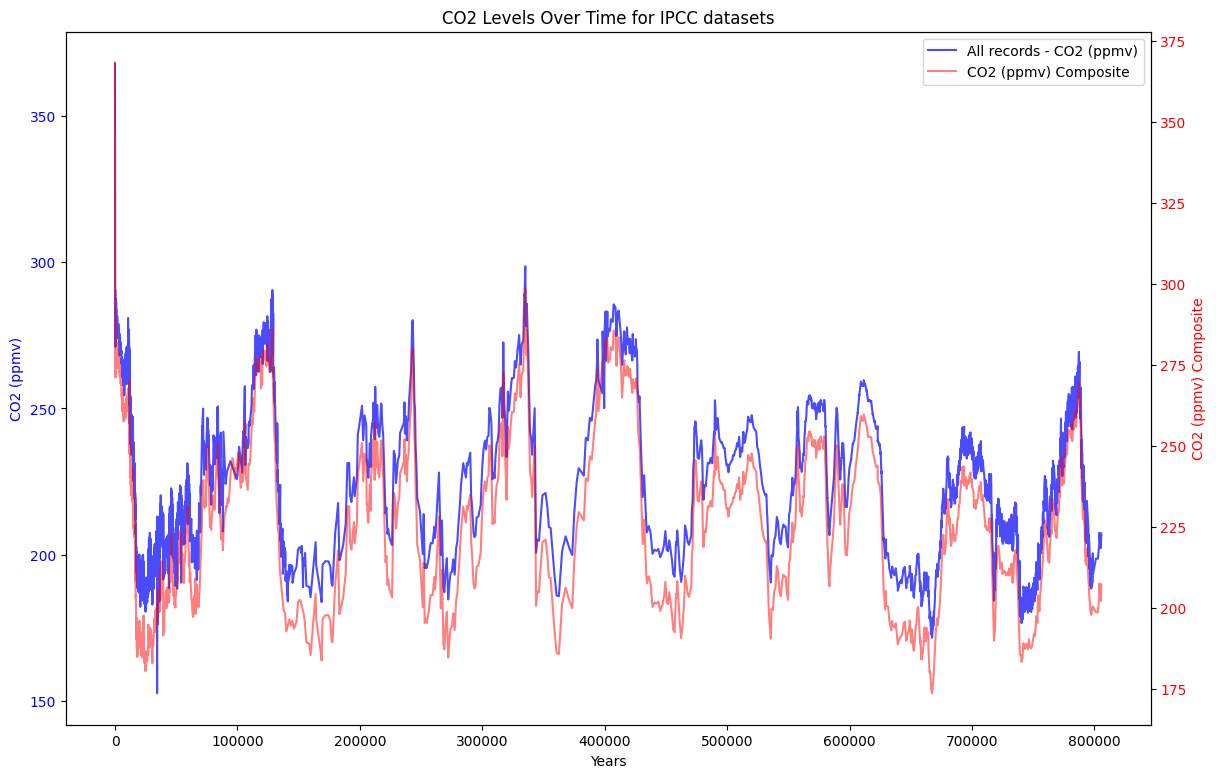

In [34]:
x1 = ipcc_co2_df_no_dup['year']
x2 = df_ipcc_composite['year']
y1 = ipcc_co2_df_no_dup['CO2 (ppmv)'] 
y2 = df_ipcc_composite['CO2 (ppmv)']

fig, ax1 = plt.subplots(figsize=(14, 9))
ax1.plot(x1, y1, 'b-', label='All records - CO2 (ppmv)', alpha=0.7)
ax1.set_xlabel('Years')
ax1.set_ylabel('CO2 (ppmv)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(x2, y2, 'r-', label='CO2 (ppmv) Composite', alpha=0.5)
ax2.set_ylabel('CO2 (ppmv) Composite', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('CO2 Levels Over Time for IPCC datasets')
#plt.savefig('CO2 Levels Over Time for IPCC datasets.png')
plt.show()

The plotted data indicates a robust correlation between the two C02 (ppmv) datasets, with slight variations observed over the course of the years. This discrepancy might be attributed to the composite sheet offering less information when compared to the all records sheet. Consequently, the dataset from the all records sheet will be considered for further comparison with the  dataset.

Now, the next and last step involves comparing the IPCC report with Luthi's Nature paper to identify potential differences between the two sources. This comparative analysis aims to uncover any disparities or variations in the information presented in these documents.

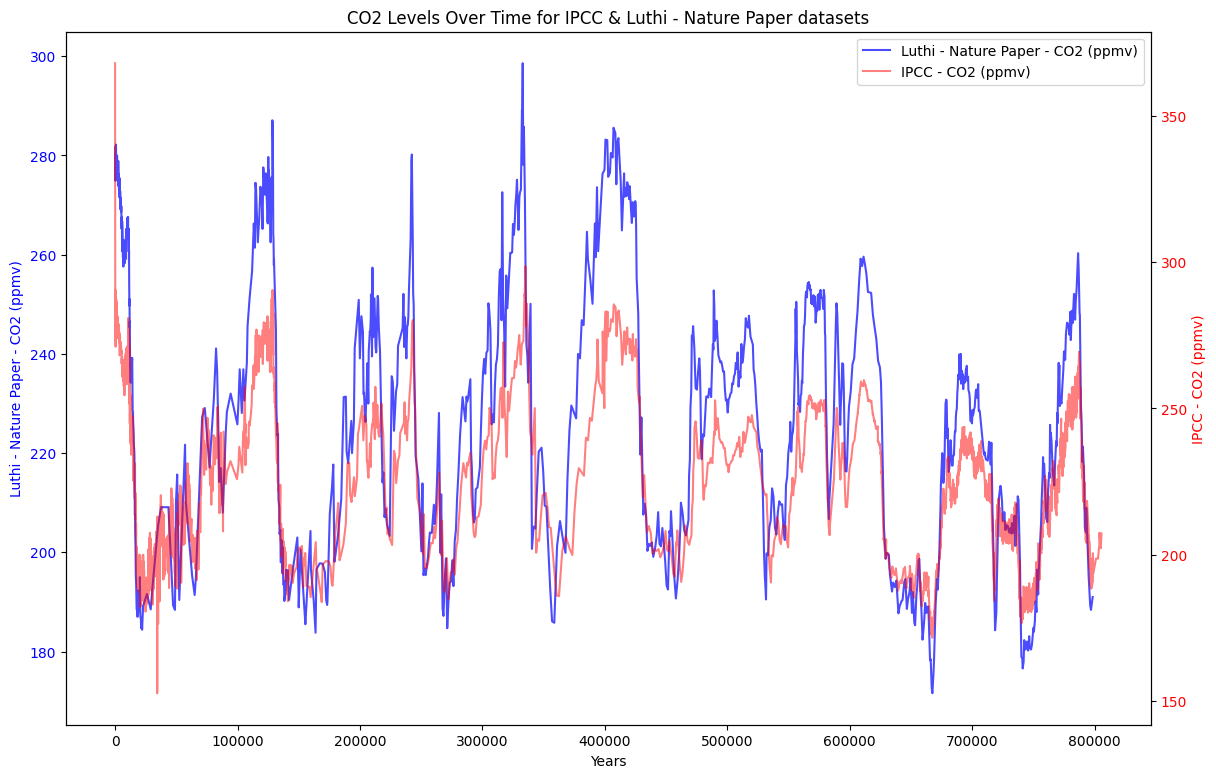

In [35]:
x1 = df['Year']
x2 = ipcc_co2_df_no_dup['year']
y1 = df['CO2 (ppmv)'] 
y2 = ipcc_co2_df_no_dup['CO2 (ppmv)']

fig, ax1 = plt.subplots(figsize=(14, 9))
ax1.plot(x1, y1, 'b-', label='Luthi - Nature Paper - CO2 (ppmv)', alpha=0.7)
ax1.set_xlabel('Years')
ax1.set_ylabel('Luthi - Nature Paper - CO2 (ppmv)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(x2, y2, 'r-', label='IPCC - CO2 (ppmv)', alpha=0.5)
ax2.set_ylabel('IPCC - CO2 (ppmv)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('CO2 Levels Over Time for IPCC & Luthi - Nature Paper datasets')
#plt.savefig('CO2 Levels Over Time for IPCC & Luthi - Nature Paper datasets.png')
plt.show()

The data performance appears to be consistently similar across almost all the years, with the primary distinction lying in the consideration of the number of CO2 (ppmv) in the two datasets. Deciding which dataset to prioritize for further analysis is challenging based solely on the presented image. To make a more informed decision, it's crucial to incorporate temperature data and compare it with both datasets. By assessing the correlation between each dataset and the temperature data, we can determine which CO2 dataset exhibits a stronger relationship. The outcome of this comparison will guide the selection of the more accurate CO2 dataset for subsequent analyses.

#### Temperature Anomaly

The Earth's climate represents a intricate and ever-changing system that has witnessed notable fluctuations across geological time spans. One crucial metric for measure these variations is the temperature anomaly, which measures the deviation of a given temperature from the long-term average. Over the past 800,000 years, the planet has undergone a sequence of climatic cycles, each leaving a distinctive mark on contemporary temperature patterns. The study of temperature anomalies throughout this extensive timeframe provides invaluable insights into the Earth's climatic history. From the glacial cycles of the Pleistocene epoch to the comparatively stable intervals in between, temperature records have been meticulously reconstructed by scientists using diverse proxies like ice cores, sediment layers, and tree rings. These records serve as a detailed account of the Earth's reactions to natural influences, encompassing changes in solar radiation and fluctuations in greenhouse gas concentrations[15].

In this analysis, two distinct datasets are utilized to examine temperature anomalies. The exploration involves a comprehensive dataset of temperature anomalies, encompassing epochs from ancient geological eras to the contemporary period. The insights derived from this analysis are vital for comprehending the current state of our climate and facilitating informed projections for the future.

#### Disclaimer

Before exploring the datasets, it is essential to establish some context. The datasets, one compiled by the researcher Jouzel, J., and the other retrieved from the [NOAA Paleoclimatology Program website](https://www.ncei.noaa.gov/access/paleo-search/study/6080), offer valuable insights into past climate conditions. These insights are derived from the examination of deuterium levels, a stable isotope of hydrogen commonly used as a proxy for past temperature variations, in ice cores. The concentration of deuterium in ice cores is influenced by the temperature at the time of snow formation. The datasets provide estimates of past temperatures based on the deuterium data.

The data retrieved from the NOAA could potentially contain a high-resolution deuterium profile extending the climate record back to marine isotope stage 20.2, approximately 800,000 years ago. This dataset offers a high-resolution (55cm) deuterium (dDice) profile from the EPICA Dome C Ice Core in Antarctica (75º 06' S, 123º 21' E), with an optimal accuracy of ±0.5‰ (1 sigma), spanning from the surface down to 3259.7 m. In the NOAA dataset, temperatures are estimated after correction for sea-water isotopic composition and for ice sheet elevation on the EDC3 age scale[16].

An intriguing aspect to note is the difference in how the two datasets calculate temperatures. The NOAA dataset uses Celsius degrees, while the Jouzel EPICA dataset employs a unique form of temperature that is neither Fahrenheit nor Kelvin. Unfortunately, no indication of the correct temperature measure has been found online. Therefore, a comprehensive analysis of both datasets is necessary to discern if any additional insights can be obtained through the analysis process.

#### Temperature Data from Jouzel EPICA Dataset

As demonstrated with the CO2 dataset, when working with a .xls file, it is necessary to convert and save the file as a CSV file before proceeding with the analysis.

In [36]:
read_file = pd.read_excel (r'dataset/Jouzel-Epica-Temperature.xls')
read_file.to_csv (r'dataset/Jouzel-temperature.csv', index = None, header=True)

In [37]:
jouzel_temperature = pd.read_csv("dataset/Jouzel-temperature.csv")

Having successfully converted the file, the next step involves conducting exploratory analysis to gain a better understanding of the dataset. 

In [38]:
# show the first 5 row of the dataset
jouzel_temperature.head()

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453


In [39]:
print(f'The dimensions of the dataset are: {jouzel_temperature.shape}')
print(f'The number of row are: {jouzel_temperature.shape[0]}')
print (f'The number of Attributes are: {jouzel_temperature.shape[1]}')

The dimensions of the dataset are: (5819, 7)
The number of row are: 5819
The number of Attributes are: 7


In [40]:
print('Find below the full summary of the Dataset:\n')
jouzel_temperature.info()

Find below the full summary of the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819 entries, 0 to 5818
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bag           5819 non-null   int64  
 1   ztop          5819 non-null   float64
 2   EDC3béta      5819 non-null   float64
 3   AICC2012      5819 non-null   float64
 4   deutfinal     5804 non-null   float64
 5   temp          5819 non-null   float64
 6   acc-EDC3beta  5819 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 318.4 KB


In [41]:
print('The missing values are:')
jouzel_temperature.isnull().sum()

The missing values are:


bag              0
ztop             0
EDC3béta         0
AICC2012         0
deutfinal       15
temp             0
acc-EDC3beta     0
dtype: int64

In [42]:
print(f'The number of Duplicated Rows is: {jouzel_temperature.duplicated().sum()}')

The number of Duplicated Rows is: 0


The dataset exhibits 15 missing values in the "deutfinal" column. Currently, this column is not integral to our analysis, and therefore, no immediate action is taken. If future analyses require a comprehensive examination of the entire dataset, steps will be taken to address and remove the null values accordingly.

Let's proceed with the temperature visualization

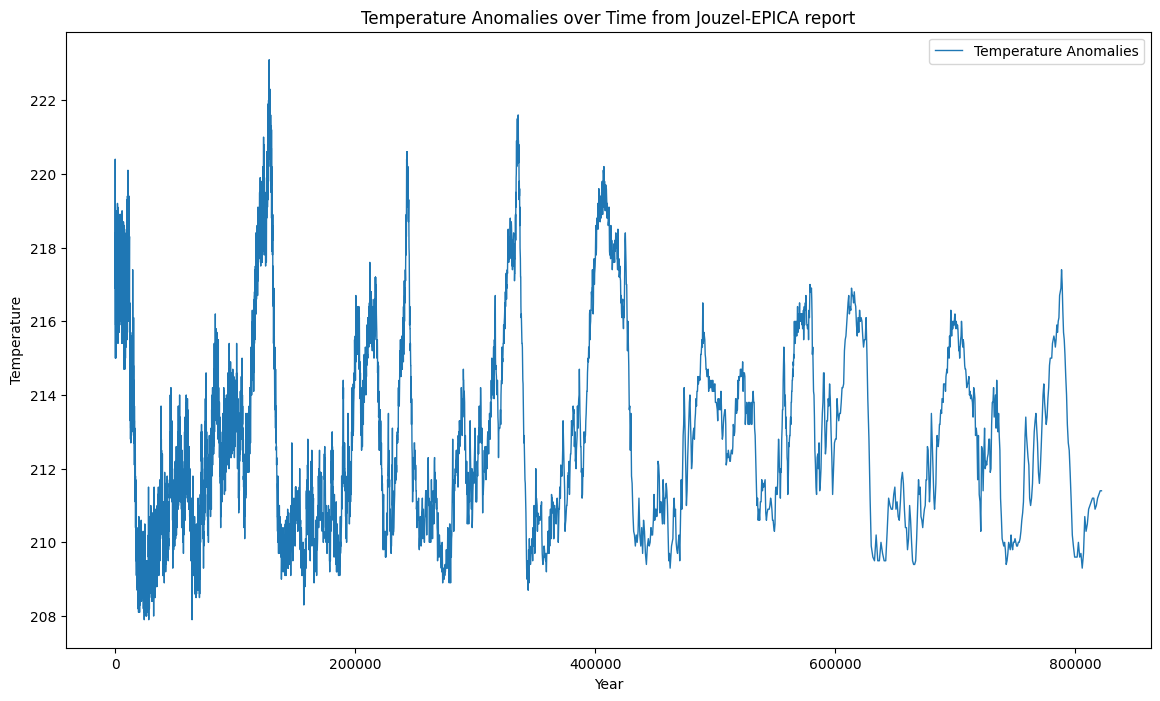

In [43]:
# visualize the dataset
plt.figure(figsize=(14, 8))
plt.plot(jouzel_temperature['AICC2012'], jouzel_temperature['temp'], linewidth=1, label='Temperature Anomalies')
plt.title('Temperature Anomalies over Time from Jouzel-EPICA report')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
#plt.savefig('Jouzel-EPICA Temperature Report visualization.png')
plt.show()

#### Temperature Data from NOAA Dataset

Unlike other datasets, the current dataset is in a .txt format, requiring specific procedures for reading and converting it into a CSV file. The pd.read_csv() function is employed to read the .txt file, and the delimiter parameter is utilized to specify the delimiter used in the file[17]. When dealing with datasets where the spacing between values is not uniform, using delimiter='\s+' ensures accurate parsing of data where columns might be separated by one or more spaces, tabs, or a combination of both[18]. Additionally, the on_bad_lines='warn' parameter is set to handle any potential issues with lines that do not conform to the expected format. This parameter allows the function to issue a warning when encountering problematic lines, providing visibility into irregularities in the dataset[19].

In [44]:
noaa_temperature = pd.read_csv('dataset/NOAA Temperature Dataset.txt', delimiter='\s+', on_bad_lines='warn')
noaa_temperature.to_csv ('dataset/temperature-NOAA.csv', index = None)

Skipping line 29: expected 11 fields, saw 12
Skipping line 30: expected 11 fields, saw 12
Skipping line 31: expected 11 fields, saw 12
Skipping line 32: expected 11 fields, saw 12
Skipping line 39: expected 11 fields, saw 12
Skipping line 40: expected 11 fields, saw 12
Skipping line 55: expected 11 fields, saw 12
Skipping line 68: expected 11 fields, saw 12
Skipping line 69: expected 11 fields, saw 17
Skipping line 89: expected 11 fields, saw 14



In [45]:
noaa_temperature = pd.read_csv('dataset/temperature-NOAA.csv')

In [46]:
# show the dataset
noaa_temperature

,EPICA,Dome,C,Ice,Core,800KYr,Deuterium,Data,and,Temperature,Estimates
0,----------------------------------------------...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World,Data,Center,for,"Paleoclimatology,",Boulder,NaN,NaN,NaN,NaN,NaN
2,and,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NOAA,Paleoclimatology,Program,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,----------------------------------------------...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5854,5796,3187.25,797408,-440.2,-8.73,NaN,NaN,NaN,NaN,NaN,NaN
5855,5797,3187.8,798443,-439,-8.54,NaN,NaN,NaN,NaN,NaN,NaN
5856,5798,3188.35,799501,-441.1,-8.88,NaN,NaN,NaN,NaN,NaN,NaN
5857,5799,3188.9,800589,-441.42,-8.92,NaN,NaN,NaN,NaN,NaN,NaN


The presented dataset demonstrates the presence of non-numerical information after converting the file from a .txt format to a .csv format. The next objective is to identify and isolate rows containing non-numerical information from the dataset.

In [47]:
noaa_temperature = noaa_temperature.iloc[59:].reset_index(drop=True)

After resizing the dataset, extra columns were detected. Subsequently, the next step involves removing all surplus columns. Simultaneously, a column renaming process will be executed to ensure consistency in the dataset structure.

In [48]:
columns_to_remove = ["800KYr", "Deuterium", "Data", "and", "Temperature", "Estimates"]
noaa_temperature = noaa_temperature.drop(columns=columns_to_remove)


In [49]:
noaa_temperature.rename(columns={
    'EPICA': 'Bag',
    'Dome': 'ztop',
    'C': 'Age',
    'Ice': 'Deuterium',
    'Core': 'Temperature'
}, inplace=True)

In [50]:
noaa_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Bag          5800 non-null   object
 1   ztop         5800 non-null   object
 2   Age          5800 non-null   object
 3   Deuterium    5788 non-null   object
 4   Temperature  5785 non-null   object
dtypes: object(5)
memory usage: 226.7+ KB


Diverse data types have been observed. Therefore, a series of operations will be conducted to modify the data types accordingly.

In [51]:
noaa_temperature = noaa_temperature.astype({"Bag": int, "ztop": float,
                                            "Age": float, "Deuterium": float,
                                            "Temperature": float})

In [52]:
print('The final version of the Dataset')
noaa_temperature

The final version of the Dataset


,Bag,ztop,Age,Deuterium,Temperature
0,1,0.00,-50.00000,NaN,NaN
1,2,0.55,-43.54769,NaN,NaN
2,3,1.10,-37.41829,NaN,NaN
3,4,1.65,-31.61153,NaN,NaN
4,5,2.20,-24.51395,NaN,NaN
...,...,...,...,...,...
5795,5796,3187.25,797408.00000,-440.20,-8.73
5796,5797,3187.80,798443.00000,-439.00,-8.54
5797,5798,3188.35,799501.00000,-441.10,-8.88
5798,5799,3188.90,800589.00000,-441.42,-8.92


Finally, let's visualize the dataset

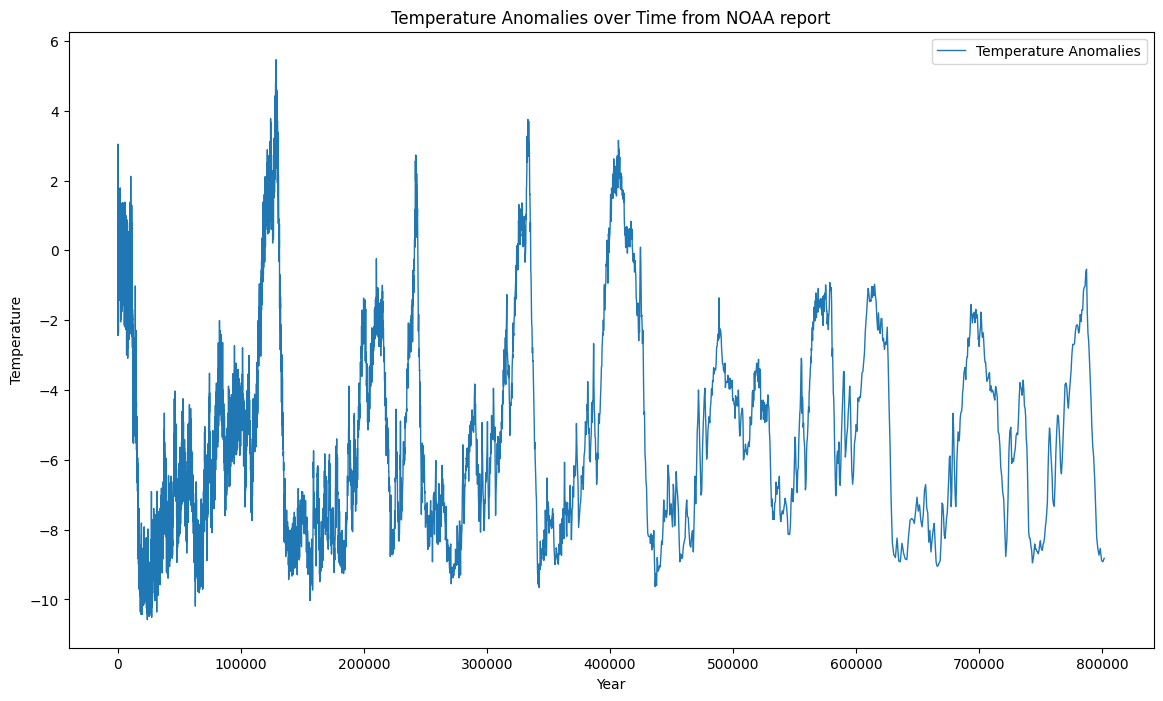

In [53]:
plt.figure(figsize=(14, 8))
plt.plot(noaa_temperature['Age'], noaa_temperature['Temperature'], linewidth=1, label='Temperature Anomalies')
plt.title('Temperature Anomalies over Time from NOAA report')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
#plt.savefig('NOAA Temperature Report visualization.png')
plt.show()

Upon importing the two datasets, the next step involves visualizing the comparison between them. This visualization aims to provide insights into the similarities and differences present in the two datasets.

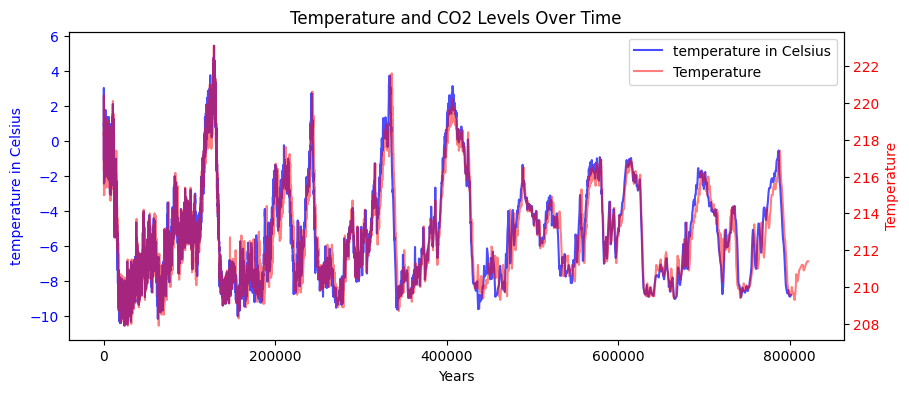

In [54]:
x1 = noaa_temperature['Age']
x2 = jouzel_temperature['AICC2012']
y1 = noaa_temperature['Temperature'] 
y2 = jouzel_temperature['temp']

fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(x1, y1, 'b-', label='temperature in Celsius', alpha=0.7)
ax1.set_xlabel('Years')
ax1.set_ylabel('temperature in Celsius', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(x2, y2, 'r-', label='Temperature', alpha=0.5)
ax2.set_ylabel('Temperature', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Temperature and CO2 Levels Over Time')
#plt.savefig('Jouzel-EPICA Vs NOAA Temperature Datasets.png')
plt.show()

In the presented plot, a strong correlation between the two datasets is evident, despite the disparity in temperature measurements. To gain a more comprehensive understanding of how temperature is calculated in the Jouzel-EPICA dataset, additional context or access to the formula used is required. Unfortunately, the dataset itself does not provide visibility into the specific calculation method employed. The temperature calculation in Jouzel-EPICA could represent a distinct temperature scale, a derived index, or serve as a proxy for temperature changes over time, such as anomalies or deviations from a baseline. The lack of detailed information hinders a precise determination of the exact nature of the temperature scale utilized in the Jouzel-EPICA dataset. Despite that, both datasets demonstrate potential for consideration in future analyses.

#### Comparison Between CO2 and Temperature from 800KYr to present

With an overall understanding of the CO2 and Temperature datasets, it's essential to compare them to explore potential correlations between these two global events. This comparison aims to uncover relationships and patterns that may exist between carbon dioxide levels and temperature changes over time.

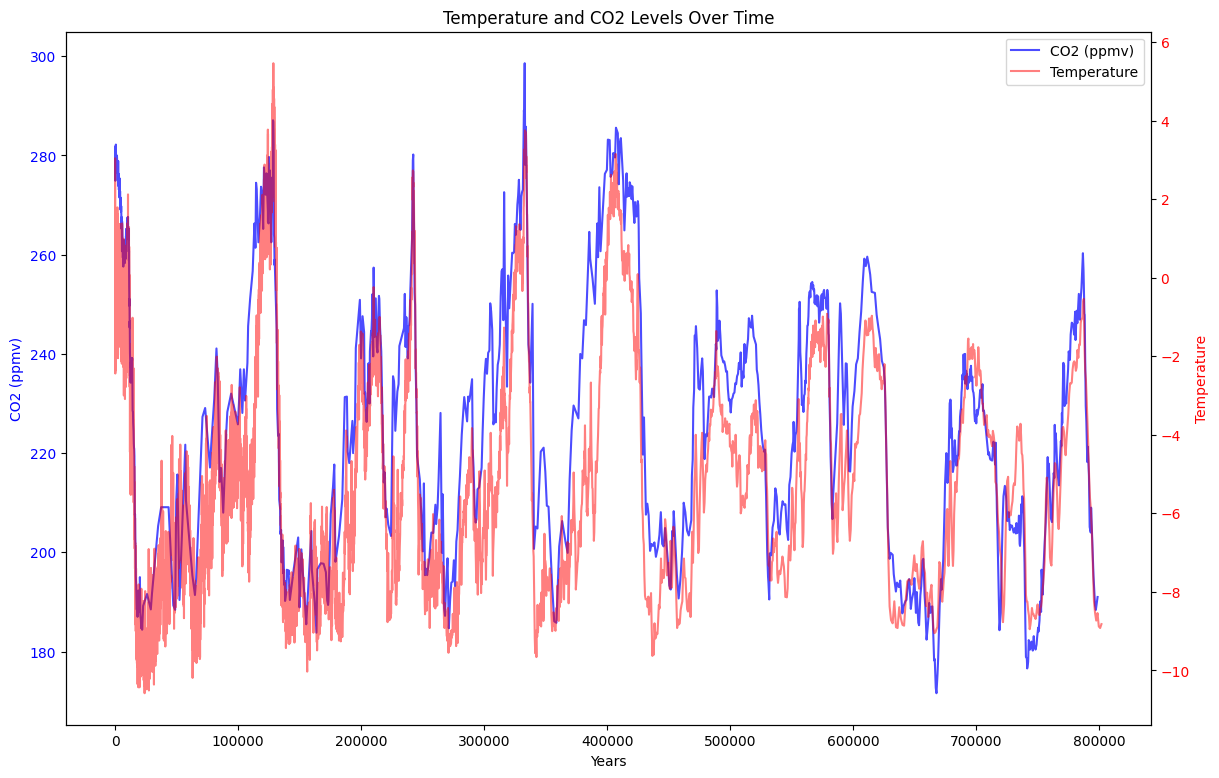

In [55]:
x1 = df['Year']
x2 = noaa_temperature['Age']
y1 = df['CO2 (ppmv)'] 
y2 = noaa_temperature['Temperature'] 

fig, ax1 = plt.subplots(figsize=(14, 9))
ax1.plot(x1, y1, 'b-', label='CO2 (ppmv)', alpha=0.7)
ax1.set_xlabel('Years')
ax1.set_ylabel('CO2 (ppmv)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(x2, y2, 'r-', label='Temperature', alpha=0.5)
ax2.set_ylabel('Temperature', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Temperature and CO2 Levels Over Time')
# plt.savefig('Temperature and CO2 Levels Over Time.png')
plt.show()

let's visualize the temperature with the IPCC Report dataset

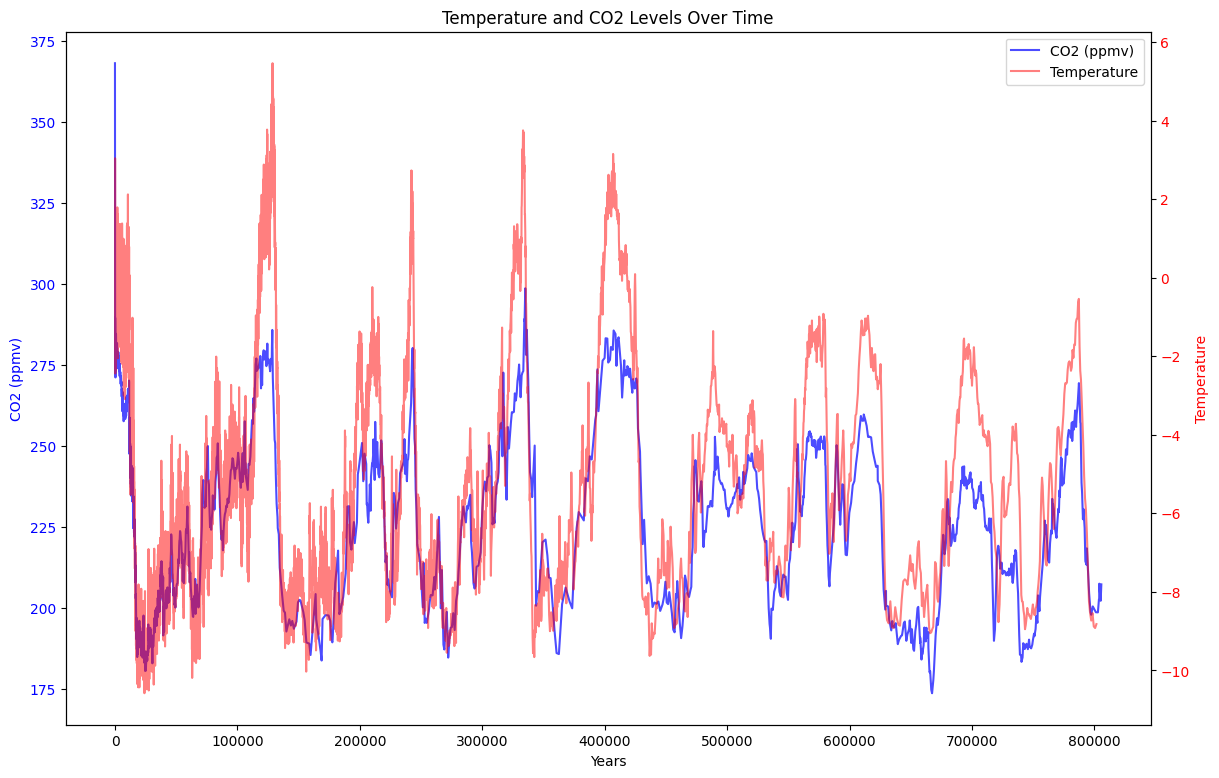

In [56]:
x1 = df_ipcc_composite['year']
x2 = noaa_temperature['Age']
y1 = df_ipcc_composite['CO2 (ppmv)'] 
y2 = noaa_temperature['Temperature'] 

fig, ax1 = plt.subplots(figsize=(14, 9))
ax1.plot(x1, y1, 'b-', label='CO2 (ppmv)', alpha=0.7)
ax1.set_xlabel('Years')
ax1.set_ylabel('CO2 (ppmv)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(x2, y2, 'r-', label='Temperature', alpha=0.5)
ax2.set_ylabel('Temperature', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Temperature and CO2 Levels Over Time')
plt.show()




The plots demonstrate a consistent trend over the years, with the Luthi et al. 2008 Nature Paper CO2 Dataset exhibiting a notably stronger relationship with the temperature dataset. Across the temporal span, both CO2 and temperature exhibit natural fluctuations, suggesting a system that achieves a quasi-equilibrium marked by distinct temperature and CO2 concentration values. This observation highlights the compelling correlation between CO2 levels and temperature variations.

#### Analyse the Present: from 1950 to present time

The subsequent phase of the analysis focuses on examining the current levels of CO2 and temperature. As previously mentioned, the dataset covers data until the year 1950, lacking information about recent decades. The forthcoming analysis aims to fill in the gaps for these missing years, providing insights into the evolution of the situation and determining whether conditions have worsened or remained stable.

#### Trends in Carbon Dioxide from 1958 to present

In relation to the CO2 level, the dataset utilized was sourced from the [NOAA website](https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv), encompassing data from March 1958 through November 2023. The dataset provides monthly mean CO2 concentrations, derived from daily mean values. It's worth noting that data before 1958 couldn't be obtained, leaving a temporal gap in the dataset.

In [57]:
# added the parameters skiprows=40 to properly skip the header lines
modern_Co2_df = pd.read_csv('dataset/CO2-from-1958-to-2023.csv', skiprows=40)

In [58]:
print('Let\'s analyse the dataset:')
modern_Co2_df

Let's analyse the dataset:


,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
784,2023,7,2023.5417,421.83,421.45,21,0.48,0.20
785,2023,8,2023.6250,419.68,421.57,21,0.45,0.19
786,2023,9,2023.7083,418.51,421.95,18,0.30,0.14
787,2023,10,2023.7917,418.82,422.10,27,0.47,0.17


An intriguing aspect of the dataset is the breakdown of the observation date into three distinct columns: year, month, and Decimal date. The Decimal Date represents a unique approach to denote dates, where each day of the year is assigned a corresponding decimal value, indicating its position within the calendar year.

In the context of this analysis, a new column named 'Date' is introduced. This involves converting the existing 'year' and 'month' columns into a datetime type. The assign function is utilized to ensure that each date corresponds to the first day of its respective month. Simultaneously, the three original columns are removed.

In [59]:
# Convert 'year' and 'month' to a single datetime column
modern_Co2_df['date'] = pd.to_datetime(modern_Co2_df[['year', 'month']].assign(day=1))

# Drop the original 'year' and 'month' columns if needed
modern_Co2_df = modern_Co2_df.drop(['year', 'month', 'decimal date'], axis=1)

# Display the modified DataFrame
modern_Co2_df



,average,deseasonalized,ndays,sdev,unc,date
0,315.70,314.43,-1,-9.99,-0.99,1958-03-01
1,317.45,315.16,-1,-9.99,-0.99,1958-04-01
2,317.51,314.71,-1,-9.99,-0.99,1958-05-01
3,317.24,315.14,-1,-9.99,-0.99,1958-06-01
4,315.86,315.18,-1,-9.99,-0.99,1958-07-01
...,...,...,...,...,...,...
784,421.83,421.45,21,0.48,0.20,2023-07-01
785,419.68,421.57,21,0.45,0.19,2023-08-01
786,418.51,421.95,18,0.30,0.14,2023-09-01
787,418.82,422.10,27,0.47,0.17,2023-10-01


Now that the dataset has been adjusted, it is time to initiate the visualization process.

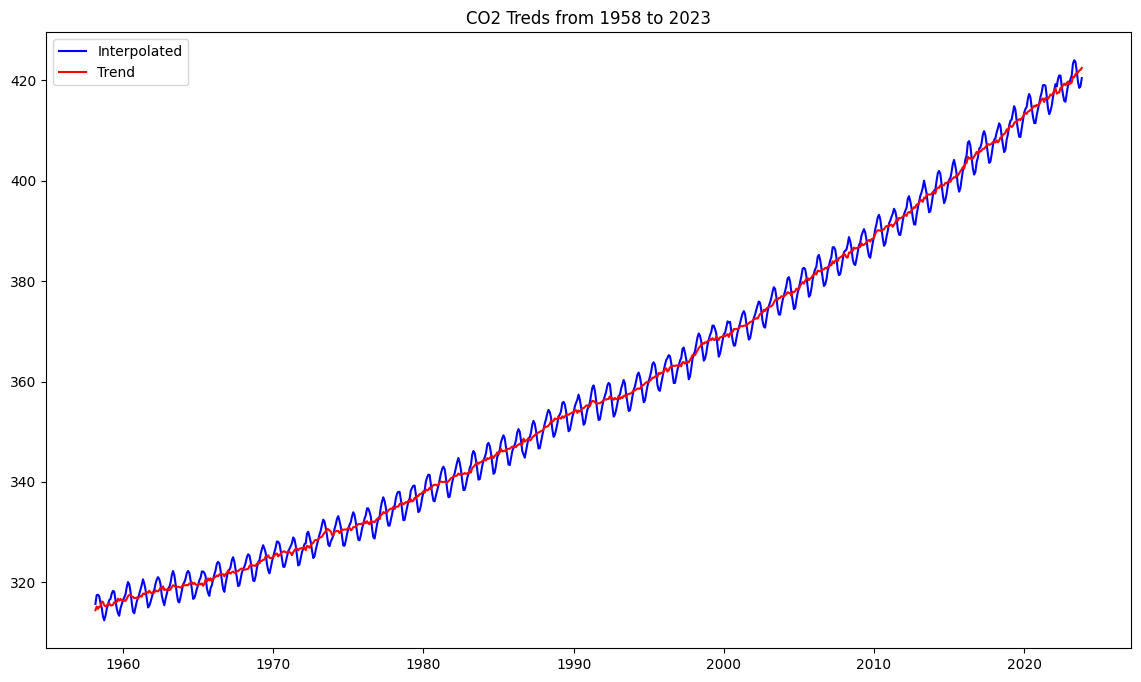

In [60]:
plt.figure(figsize=(14, 8))
plt.plot(modern_Co2_df['date'], modern_Co2_df['average'], linestyle='-', label='Interpolated', color='blue')
plt.plot(modern_Co2_df['date'], modern_Co2_df['deseasonalized'], linestyle='-', label='Trend', color='red')

plt.title('CO2 Treds from 1958 to 2023')
plt.legend()
#plt.savefig('CO2 Treds from 1958 to 2023.png')
plt.show()

The graphs illustrate the monthly mean carbon dioxide levels measured at the Mauna Loa Observatory in Hawaii. Initiated by C. David Keeling of the Scripps Institution of Oceanography in March 1958, these measurements were then observed by the National Oceanic and Atmospheric Administration in May 1974. The blue lines in the graph indicate the monthly mean CO2 values, while the red line shows the same values after correction for the average seasonal cycle. It's notable that there's a clear upward trend in CO2 levels over the years[20].

#### Temperature levels from 1960 to present

In relation to the Temperature, the dataset utilized was sourced from the [NOAA website](https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/ytd/1/1850-2023/data.csv?trend=true&trend_base=100&begtrendyear=1850&endtrendyear=2023&filter=true&filterType=binomial), encompassing data from 1850 through 2023. The dataset provides yearly temperature anomalies.

In [61]:
modern_temperature_df = pd.read_csv('dataset/NOAA-Temperature-From-1850-to-2023.csv', skiprows=4)


In [62]:
print('Let\'s analyse the dataset:')
modern_temperature_df

Let's analyse the dataset:


,Year,Anomaly
0,1850,-0.37
1,1851,-0.12
2,1852,-0.15
3,1853,0.00
4,1854,-0.23
...,...,...
169,2019,0.91
170,2020,1.13
171,2021,0.83
172,2022,0.93


In [63]:
print('let\'s check the Dataset information:')
modern_temperature_df.info()

let's check the Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     174 non-null    int64  
 1   Anomaly  174 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.8 KB


Let's visualize the Temperature Anomalies

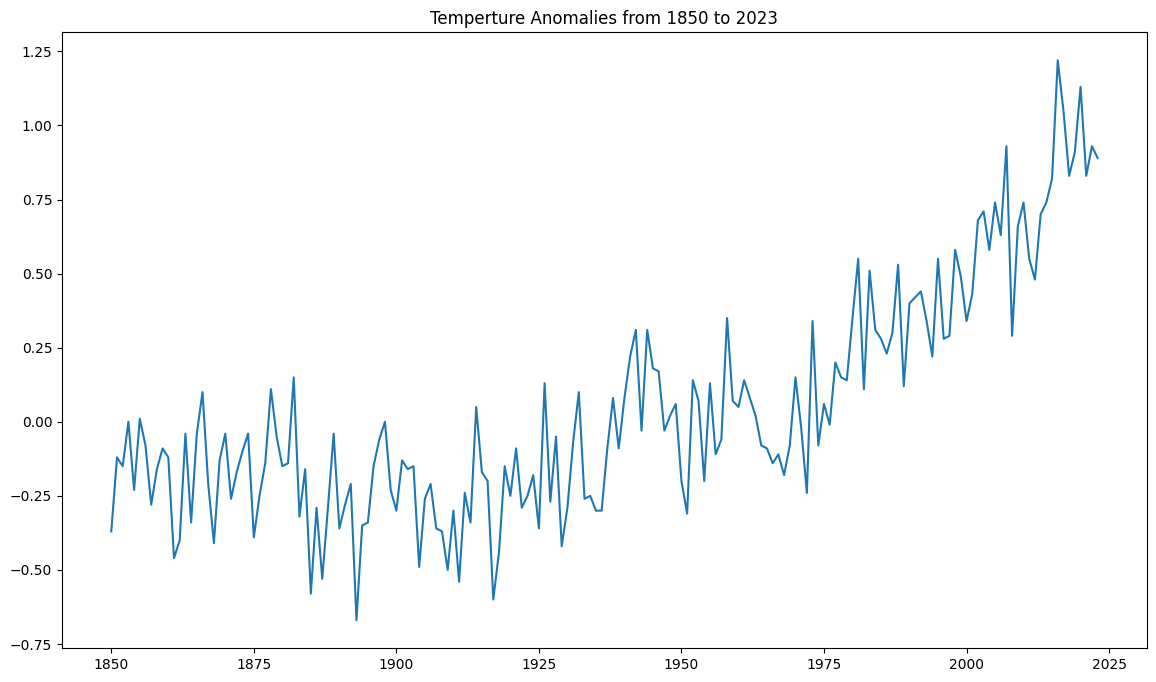

In [64]:
plt.figure(figsize=(14, 8))
plt.plot(modern_temperature_df['Year'], modern_temperature_df['Anomaly'])

plt.title('Temperture Anomalies from 1850 to 2023')
# plt.savefig('Temperture Anomalies from 1850 to 2023.png')
plt.show()


The temperature trend appears to mirror the pattern observed in CO2 levels, showing a notable exponential increase over the years. This growth in temperature signifies a substantial upward trajectory, likely linked to various environmental factors, such as human activities, greenhouse gas emissions, and global climate changes. The consistent rise in temperature could potentially pose significant implications for ecosystems, weather patterns, and global climate systems in the future.

## Part 2

In this section, an exploration of a significant factor contributing to climate change is conducted, focusing on the feature of Nitrous Oxide (N2O). Nitrous Oxide, classified as a greenhouse gas, plays a crucial role in the dynamics of the Earth's climate due to its distinct characteristics and contributions to the greenhouse effect. Emissions of Nitrous Oxide primarily arise from various human activities, including agriculture, land use changes, and industrial processes, which contribute to the increased concentration of N2O in the atmosphere. Additionally, Nitrous Oxide is naturally present in the atmosphere as part of the Earth's nitrogen cycle, featuring a range of natural sources. Globally, around 40% of the overall N2O emissions originate from human activities, including the combustion of fossil fuels, solid waste, and wastewater treatment. The concentration of N2O, like other greenhouse gases, is measured in parts per million (ppm). Notably, Nitrous Oxide molecules remain in the atmosphere for an average of 121 years before undergoing removal through a sink or chemical reactions[21].

#### N2O Trend level over time

The dataset related to N2O levels was obtained from the [NOAA Website](https://www.ncei.noaa.gov/access/paleo-search/study/9959) with the assistance of researchers such as MacFarling Meure, C.; Etheridge, D.M.; Trudinger, C.; Steele, L.P.; Langenfelds, R.L.; van Ommen, T.D.; Smith, A.M.; Elkins, J. These researchers conducted analyses to monitor N2O levels over the years.


According to the information provided in the dataset's readme section, the [dataset](https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/law/law2006.xls) utilizes new measurements of atmospheric greenhouse gas concentrations obtained from ice cores at Law Dome, Antarctica. The objective of these measurements is to reconstruct records for CO2, CH4, and, additionally, N2O, spanning a temporal range extending back 2000 years before present (BP). Notable observations reveal significant increases in the concentrations of CO2, CH4, and N2O over the past two centuries, following a preceding period of relative stability. Decadal variations in the industrial era include the stabilization of CO2 levels and a deceleration in the growth of CH4 and N2O during the 1940s and 1950s. Moreover, preindustrial periods exhibit variations of up to 10 ppm for CO2, 40 ppb for CH4, and 10 ppb for N2O.

In [83]:
# importing the Dataset
n20_df = pd.read_excel('dataset/law2006.xls', sheet_name='N2O by age')
n20_df.to_csv ('dataset/N2O-report.csv', index = None, header=True)

In [84]:
n20_df = pd.read_csv('dataset/N2O-report.csv')
# Display the dataset
n20_df


,Sample Type,N2O gas age years AD,N2O (ppb),Unnamed: 3,publication status
0,CAPE GRIM,2004.000000,318.720000,NaN,NaN
1,CAPE GRIM,2003.000000,317.530000,NaN,NaN
2,CAPE GRIM,2002.000000,316.970000,NaN,NaN
3,CAPE GRIM,2001.000000,316.180000,NaN,NaN
4,CAPE GRIM,2000.000000,315.620000,NaN,NaN
...,...,...,...,...,...
118,DSS,168.340448,265.143775,NaN,MacFM 2004/2006
119,DSS,135.983072,266.069590,NaN,MacFM 2004/2006
120,DSS,55.959144,264.158230,NaN,MacFM 2004/2006
121,DSS,29.524058,263.132865,NaN,MacFM 2004/2006


In [85]:
#remove the additional columns
n20_df = n20_df.drop(['Sample Type', 'Unnamed: 3', 'publication status'], axis=1)

After preparing the dataset, the next step involves visualizing the data to comprehend the trends of N2O over the years. 

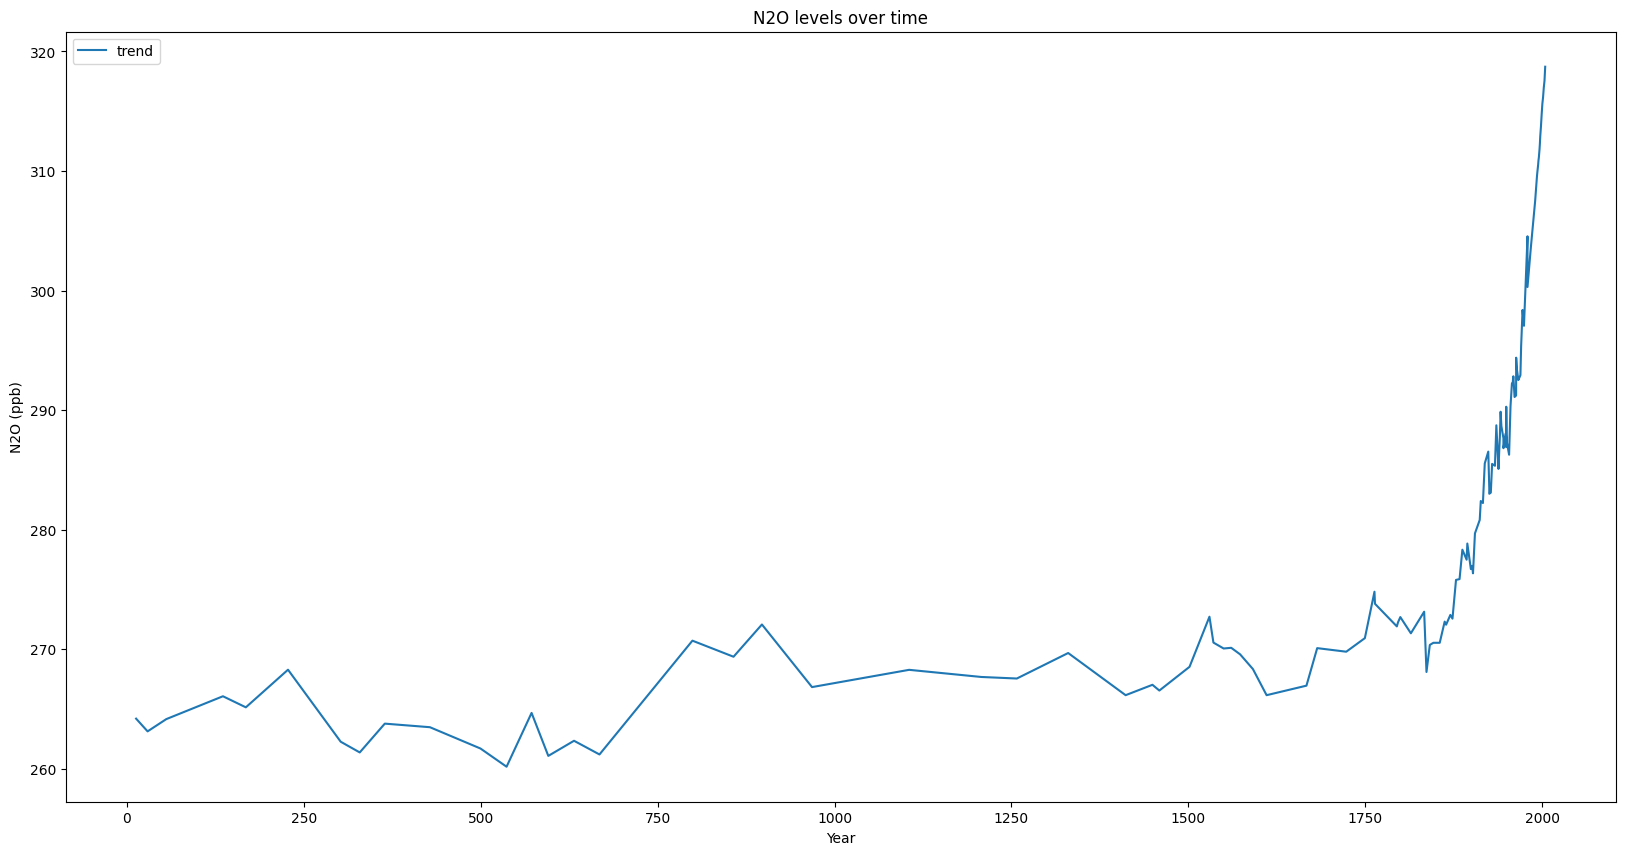

In [92]:
plt.figure(figsize=(20, 10))
plt.plot(n20_df['N2O gas age years AD'], n20_df['N2O (ppb)'], label='trend')
plt.title('N2O levels over time')
plt.xlabel('Year')
plt.ylabel('N2O (ppb)')
plt.legend(loc='upper left')
# plt.savefig('N2O levels over time.png')
plt.show()


The plotted data illustrates a consistent stability in atmospheric concentrations of nitrous oxide over thousands of years. However, a notable deviation from this stability becomes evident in the last 200 years, indicating a significant increase. This upward trend in atmospheric concentrations is expected to persist, contributing to nitrous oxide's current representation of approximately 7% in the net radiative forcing of the climate system. This, in turn, plays a role in the ongoing escalation of global average temperatures[22].

#### CO2 Vs N2O Level over time

The objective of the following analysis is to explore the temporal trends of CO2 and N2O and understand their individual contributions to the Earth's atmosphere. This examination involves the historical data of both gases from the same dataset, aiming to uncover patterns and potential correlations. By comparing the trends of CO2 and N2O, the intention is to determine which gas has had a more significant impact on the Earth's atmospheric composition.

In [93]:
# importing the CO2 dataset
CO2_df = pd.read_excel('dataset/law2006.xls', sheet_name='CO2 by age')

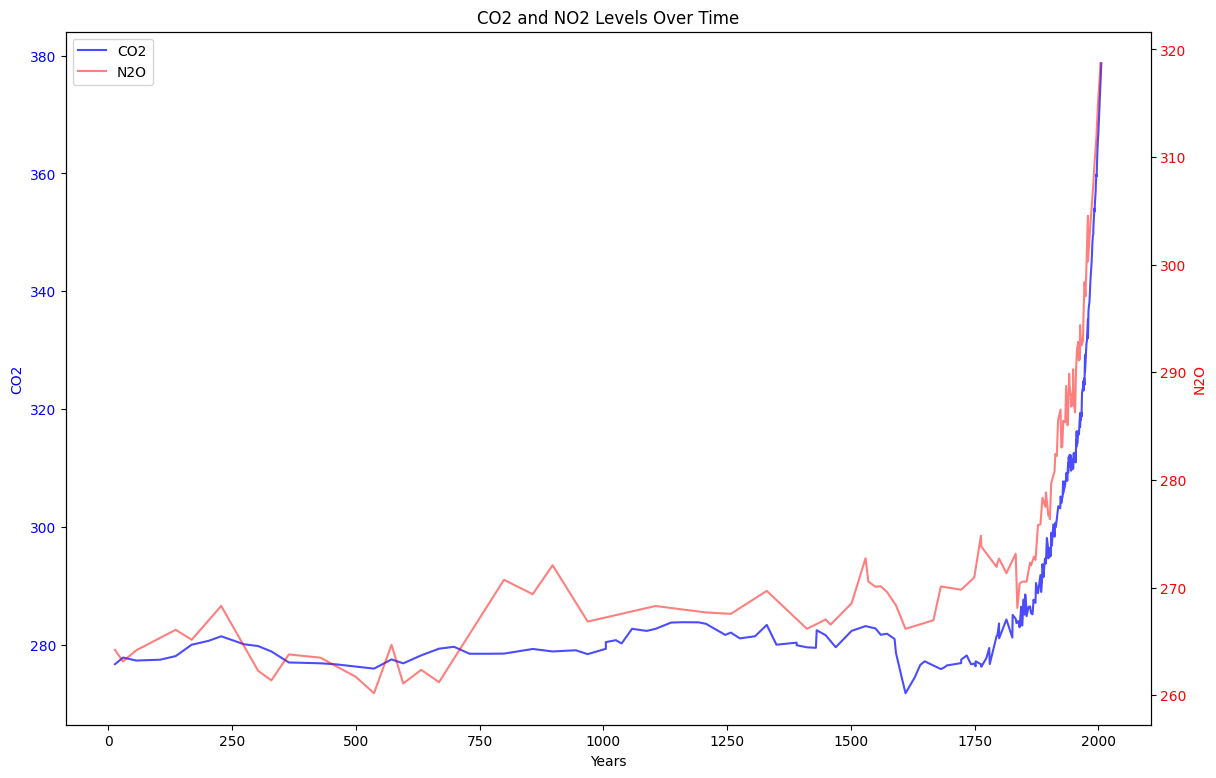

In [102]:
# visualize the CO2 and N2O trend
x1 = CO2_df['CO2 gas age years AD']
x2 = n20_df['N2O gas age years AD']
y1 = CO2_df['CO2 (ppm)'] 
y2 = n20_df['N2O (ppb)'] 

fig, ax1 = plt.subplots(figsize=(14, 9))
ax1.plot(x1, y1, 'b-', label='CO2', alpha=0.7)
ax1.set_xlabel('Years')
ax1.set_ylabel('CO2', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
ax2.plot(x2, y2, 'r-', label='N2O', alpha=0.5)
ax2.set_ylabel('N2O', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('CO2 and NO2 Levels Over Time')
# plt.savefig('CO2 and NO2 Levels Over Time.png')
plt.show()

 The data suggests a pattern of relative stability followed by a more recent period of change or fluctuation. This shift in the trend may signify significant changes in the dynamics or concentrations of the gases over time.

#### N2O level in the moder time

This section of the analysis aims to closely examine the trends in N2O levels over the past two decades, spanning from 2000 to 2023. The objective is to assess whether there has been an increase or decrease in N2O levels during this period in comparison to historical data.

Also in this case, the dataset has been obtained from the [NOAA website](https://gml.noaa.gov/webdata/ccgg/trends/n2o/n2o_mm_gl.txt).

In [103]:
new_N2o = pd.read_csv('dataset/N2O-from-2000-to-2023.csv')

In [104]:
new_N2o

,year,month,decimal,average,average_unc,trend,trend_unc
0,2001,1,2001.042,316.30,0.16,316.03,0.14
1,2001,2,2001.125,316.31,0.17,316.09,0.14
2,2001,3,2001.208,316.21,0.16,316.15,0.14
3,2001,4,2001.292,316.12,0.14,316.22,0.14
4,2001,5,2001.375,316.11,0.14,316.28,0.14
...,...,...,...,...,...,...,...
267,2023,4,2023.292,336.58,-9.99,336.56,-9.99
268,2023,5,2023.375,336.58,-9.99,336.65,-9.99
269,2023,6,2023.458,336.61,-9.99,336.75,-9.99
270,2023,7,2023.542,336.67,-9.99,336.84,-9.99


In [105]:
# Convert 'year' and 'month' to a single datetime column
new_N2o['date'] = pd.to_datetime(new_N2o[['year', 'month']].assign(day=1))

# Drop the original 'year' and 'month' columns if needed
new_N2o = new_N2o.drop(['year', 'month', 'decimal'], axis=1)

# Display the modified DataFrame
new_N2o

,average,average_unc,trend,trend_unc,date
0,316.30,0.16,316.03,0.14,2001-01-01
1,316.31,0.17,316.09,0.14,2001-02-01
2,316.21,0.16,316.15,0.14,2001-03-01
3,316.12,0.14,316.22,0.14,2001-04-01
4,316.11,0.14,316.28,0.14,2001-05-01
...,...,...,...,...,...
267,336.58,-9.99,336.56,-9.99,2023-04-01
268,336.58,-9.99,336.65,-9.99,2023-05-01
269,336.61,-9.99,336.75,-9.99,2023-06-01
270,336.67,-9.99,336.84,-9.99,2023-07-01


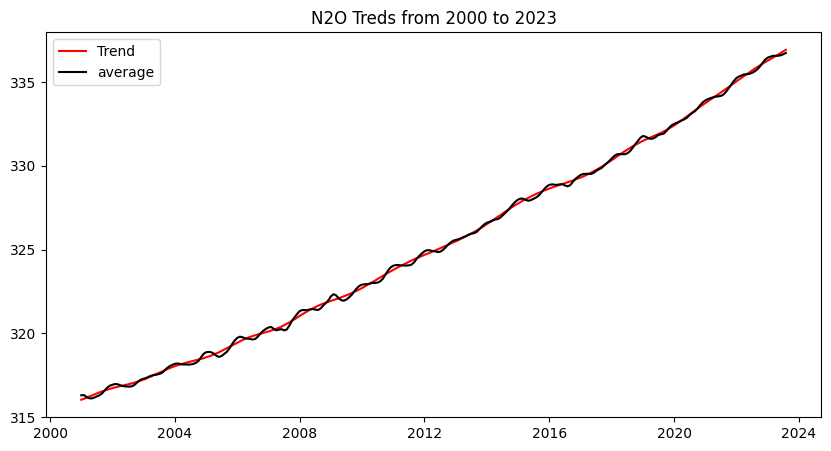

In [108]:
plt.figure(figsize=(10, 5))
plt.plot(new_N2o['date'], new_N2o['trend'], linestyle='-', label='Trend', color='red')
plt.plot(new_N2o['date'], new_N2o['average'], linestyle='-', label='average', color='black')
plt.title('N2O Treds from 2000 to 2023')
plt.legend()
#plt.savefig('N2O Treds from 2000 to 2023.png')
plt.show()

The graph illustrate the globally-averaged, monthly mean atmospheric nitrous oxide abundance, which has been determined based on data collected from marine surface sites since the 1997. The process of constructing a global average involves initially smoothing the data for each site over time. Subsequently, the smoothed values for each site are fitted as a function of latitude, utilizing 48 equally-spaced time steps per year. Global means are then calculated from the latitude fits at each time step. In the figures, the red line represents globally averaged monthly mean values, centered on the middle of each month. The black line illustrates the long-term trend, where the average seasonal cycle has been removed[23]. 

The above graph indicates a concerning trend over time, suggesting a deterioration in the situation. The observed rapid increase in atmospheric nitrous oxide levels poses a significant risk of surpassing the 2°C warming limit outlined in the 2015 Paris agreements. Over the past few decades, N2O levels have surged by 20% from pre-industrial levels. This surge in N2O is primarily attributed to the amplified use of nitrogen-based fertilizers in global food production. The escalating demand for animal feed and food production is anticipated to further fuel the rise in atmospheric N2O. Agricultural activities stand as the main driver behind the increasing N2O emissions, particularly in emerging nations like Brazil, China, and India, where food production has notably surged. Remarkably, Europe stands out as the sole region that has managed to reduce its emissions in the last two decades. This achievement is credited to stringent agricultural and industrial policies implemented in the region[24].

## Part 3

### References

[1]: Chugh v., [2023]. "Python pandas tutorial: The ultimate guide for beginners". [Datacamp](https://www.datacamp.com/tutorial/pandas)

[2]: matplotlib, [n.d.]. "matplotlib.pyplot". [matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html)

[3]: Zach, [2021]. "The Easiest Way to Use NumPy: import numpy as np". [Statology](https://www.statology.org/import-numpy-as-np/#:~:text=The%20import%20numpy%20portion%20of,function_name%20rather%20than%20numpy.)

[4]: Scipy, [n.d.]. "Statistical functions (scipy.stats)". [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)

[5]: Seaborn, [n.d.]. "An introduction to seaborn". [Seaborn](https://seaborn.pydata.org/tutorial/introduction.html)

[6] Data to Fish, (2021). "*Convert Excel to CSV using Python (example included)*". [Data to Fish](https://datatofish.com/excel-to-csv-python/)

[7] Pankaj, (2022). "*Pandas to_csv() - Convert DataFrame to CSV*". [DigitalOcean](https://www.digitalocean.com/community/tutorials/pandas-to_csv-convert-dataframe-to-csv)

[8] Barney H., (2020). "*How to read CSV File into Python using Pandas*". [Towards Datascience](https://towardsdatascience.com/how-to-read-csv-file-using-pandas-ab1f5e7e7b58)

[9] Geeks for Geeks, (n.d.). "*How to rename multiple column headers in a Pandas DataFrame?*". [Geeks for Geeks](https://www.geeksforgeeks.org/how-to-rename-multiple-column-headers-in-a-pandas-dataframe/)

[10] Vijetha, (2023). "*Pandas Drop the First Row of DataFrame*". [Spark By Examples](https://sparkbyexamples.com/pandas/pandas-drop-first-row-of-dataframe/#:~:text=You%20can%20delete%2Fdrop%20the,%5B%5D%20and%20tail()%20methods)

[11] Pandas, (n.d.). "*pandas.DataFrame.reset_index*". [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)

[12] Naveen, (2023). "*Different Ways to Change Data Type in pandas*". [Spark By Examples](https://sparkbyexamples.com/pandas/pandas-change-column-data-type-dttype/#:~:text=astype()%20to%20Change%20Data,types%20to%20the%20same%20type)

[13] Lüthi, D., Le Floch, M., Bereiter, B. et al., (2008). "*High-resolution carbon dioxide concentration record 650,000–800,000 years before present*". Nature 453, 379–382 (2008). [Nature](https://doi.org/10.1038/nature06949)

[14] Capitol One Tech, (2023). "*Pandas DataFrame: How to concatenate with Python examples*". [Capitol One](https://www.capitalone.com/tech/open-source/pandas-dataframe-concat/)

[15] Energy Education, (n.d.). "*Global surface temperature anomaly*". [Energy Education](https://energyeducation.ca/encyclopedia/Global_surface_temperature_anomaly)

[16] Jouzel, J., V. Masson-Delmotte, O. Cattani, G. Dreyfus, S. Falourd, G. Hoffmann, B. Minster, J. Nouet, J.M. Barnola, J. Chappellaz, H. Fischer, J.C. Gallet, S. Johnsen, M. Leuenberger, L. Loulergue, D. Luethi, H. Oerter, F. Parrenin, G. Raisbeck, D. Raynaud, A. Schilt, J. Schwander, E. Selmo, R. Souchez, R. Spahni, B. Stauffer, J.P. Steffensen, B. Stenni, T.F. Stocker, J.L. Tison, M. Werner, and E.W. Wolff. (2007). "*Orbital and Millennial Antarctic Climate Variability over the Past 800,000 Years*". Science, 317(5839), 793-797. [doi: 10.1126/science.1141038](https://www.ncei.noaa.gov/access/paleo-search/study/6080)

[17] Myrianthous G., (2022). "*How To Load Data From Text File into Pandas*". [Towards Datascience](https://towardsdatascience.com/txt-to-pandas-df3aeaf92548)

[18] Stack Overflow, (2017). "*Customizing the separator in pandas read_csv*". [Stack Overflow](https://stackoverflow.com/questions/41235111/customizing-the-separator-in-pandas-read-csv)

[19] Stack Overflow, (2017). "*Pandas on_bad_lines = 'skip' not doing anything*". [Stack Overflow](https://stackoverflow.com/questions/72325898/pandas-on-bad-lines-skip-not-doing-anything)

[20] Global Moitoring Laboratory, (n.d.). "*Trends in Atmospheric Carbon Dioxide*". [Global Moitoring Laboratory](https://gml.noaa.gov/ccgg/trends/mlo.html)

[21] EPA, (n.d.). "*Overview of Greenhouse Gases*". [EPA](https://www.epa.gov/ghgemissions/overview-greenhouse-gases#:~:text=Nitrous%20oxide%20molecules%20stay%20in,1%20pound%20of%20carbon%20dioxide.&text=Globally%2C%2040%25%20of%20total%20N,emissions%20come%20from%20human%20activities.)

[22] Peters G., (2020). "*Nitrous oxide: A potent, long-lived, and rapidly increasing greenhouse gas*". [Cicero](https://cicero.oslo.no/en/articles/nitrous-oxide-a-potent-long-lived-and-rapidly-increasing-greenhouse-gas)

[23] Global Moitoring Laboratory, (n.d.). "*Trends in Atmospheric Nitrous Oxide*". [Global Moitoring Laboratory](https://gml.noaa.gov/ccgg/trends_n2o/)

[24] Consiglio Nazionale delle Ricerche, (2020). "*N2O, an increasing threat for climate*". [Consiglio Nazionale delle Ricerche](https://www.cnr.it/it/comunicato-stampa/9777/n2o-an-increasing-threat-for-climate)

#### Additional Redings

- The Kitchin Research Group, (2013). "*Plotting two datasets with very different scales*". [The Kitchin Research Group](https://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)
- National Centers for Environmental Information, (n.d.). "*Anomalies vs. Temperature*". [NCEI](https://www.ncei.noaa.gov/access/monitoring/dyk/anomalies-vs-temperature)
- Pandas. "*pandas.read_csv*". [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
- For Brains, (n.d.) "*Decimal Time Explained - What is Decimal Time?*". [For Brains](https://forbrains.co.uk/education/decimal_time_explained)
- Stack Overflow, (2014). "*Convert Pandas Column to DateTime*". [Stack Overflow](https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime)


***
End